# **Laboratorio 1**
### MDS7203 Modelos Generativos
### **Autor**: Arturo Lazcano
### **Profesor**: Felipe Tobar
### **Auxiliares**: Cristóbal Alcázar, Camilo Carvajal Reyes


---

In [1]:
# Importar librerías
import numpy as np
import scipy as sp
from scipy.stats import halfnorm, norm, expon, multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
!pip install celluloid
from celluloid import Camera
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Parámetros de gráficos
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = 14,6

# P1

## (a)  
Genere $\mu$ que distribuyan según una ley “semi normal” (half-normal en inglés), i.e., tal que $\mu = |X|$ (donde $|\cdot|$ denota el valor absoluto) con $X \sim \mathcal{N} (0, σ^2)$ para $σ^2 = 10$.

In [8]:
# Semilla
np.random.seed(204700516)

# Generar media y std
mu = 0
sigma = np.sqrt(10)

# Cantidad de datos
num_samples = 10000

# Generar normal
x = np.random.normal(mu, sigma, num_samples)

# Valor absoluto
mu_halfnormal = abs(x)
print('Promedio:', np.mean(mu_halfnormal))

Promedio: 2.538907139154521


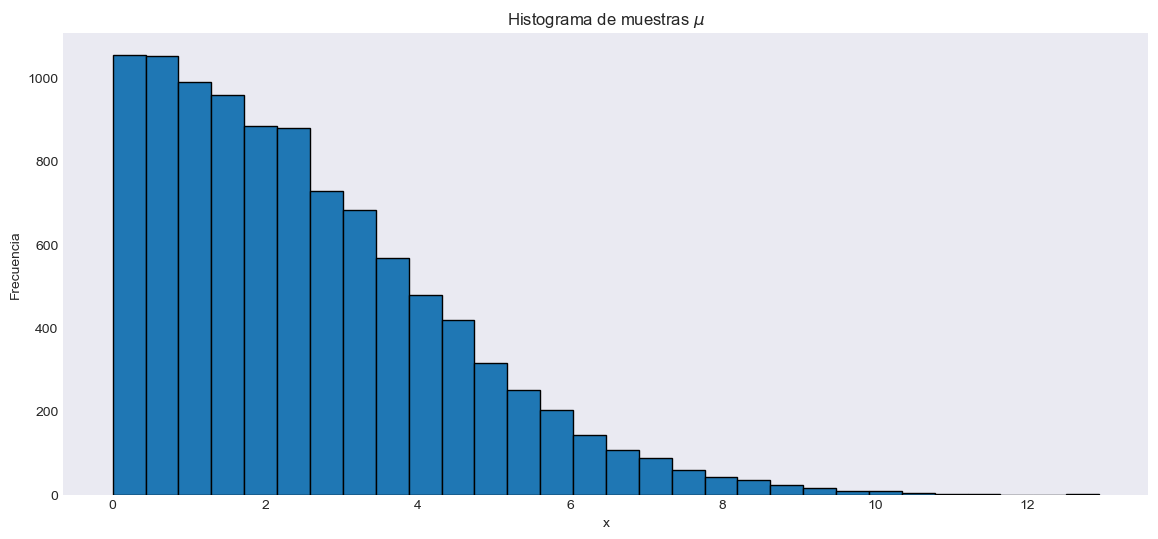

In [9]:
# Graficar muestras (historgrama)
plt.hist(mu_halfnormal, 30, ec='black')
plt.title(r'Histograma de muestras $\mu$')
plt.ylabel('Frecuencia')
plt.xlabel('x')
#plt.savefig('img1.pdf')
plt.show()

## (b)  
Genere n muestras $x_i \sim \mathcal{N} (\mu, 5)$.

In [15]:
# Semilla
np.random.seed(204700516)

# Parámetros
n = 10000

# Generar normal
mu_hf_fijo = abs(np.random.normal(mu, sigma, 1))[0]
print('mu:', mu_hf_fijo)
lista_xi = np.random.normal(mu_hf_fijo, np.sqrt(5), n)

mu: 1.118585924871676


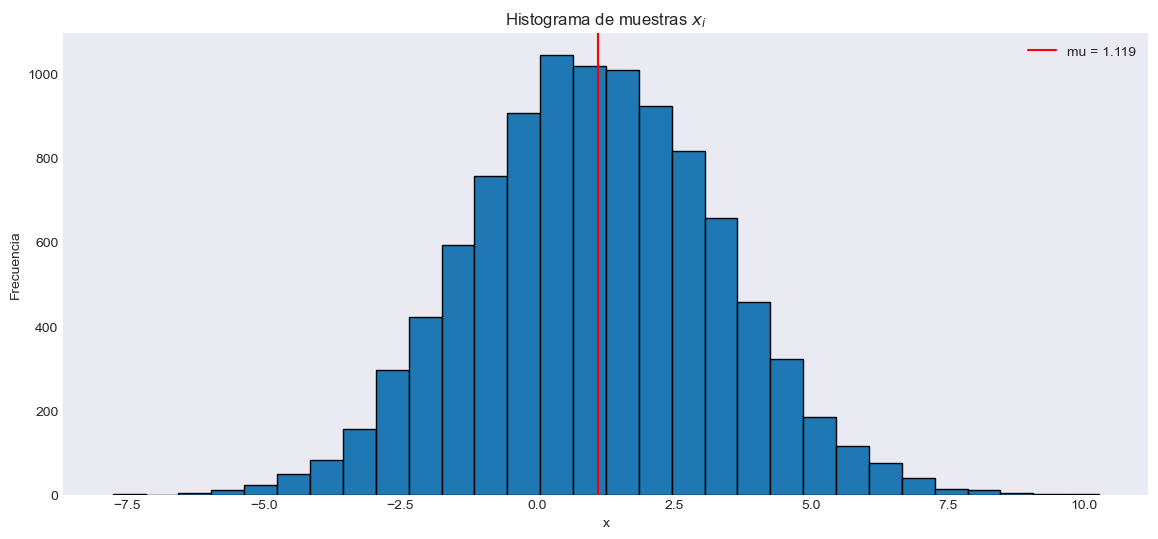

In [16]:
# Graficar muestras
plt.hist(lista_xi, 30, ec='black')
plt.axvline(x=mu_hf_fijo, label=f'mu = {np.round(mu_hf_fijo, 3)}', c='r')
plt.title(r'Histograma de muestras $x_i$')
plt.ylabel('Frecuencia')
plt.xlabel('x')
plt.legend()
#plt.savefig('img2.pdf')
plt.show()

## (c)  
Exprese $p(\mu|x_1, . . . , x_n)$:

\begin{equation}
  \displaystyle
  p(\mu|x_1,..., x_n) = \frac{p(x_1,..., x_n | \mu)p(\mu)}{p(x_1, . . . , x_n)} = \frac{ \displaystyle \prod_{i=1}^n p(x_i| \mu) p(\mu) }{ \displaystyle \prod_{i=1}^n p(x_i) }
\end{equation}


Donde en la primera igualdad se usa el Teorema de Bayes, mientras que en la segunda se asume cada dato i.i.d.



---

## (d)  
Genere $m$ muestras de $p(\mu|x_1, . . . , x_n)$ usando Metropolis-Hastings. Puede seleccionar la distribución auxiliar $q$ que le parezca adecuada.


In [17]:
def metropolis_hastings(p, q, initial_state, n, m, burnin=0, thinning=1):
  '''
  Algoritmo que entrega m muestras con Metropolis-Hastings usando distribución propuesta q
  '''
  lista_xi = np.random.normal(mu_hf_fijo, np.sqrt(5), n)
  samples = [initial_state]

  for i in range(1, m*thinning):
    mu_actual = samples[-1]
    mu_c = q(mu_actual)
    p_mu_i = p(lista_xi, mu_actual)
    p_mu_c = p(lista_xi, mu_c)
    ratio = min(p_mu_c / p_mu_i, 1)
    u = np.random.uniform(0, 1)

    if ratio > u:
      samples.append(mu_c)

    else:
      samples.append(mu_actual)

  # Burn in y thinning
  samples = samples[::thinning]
  idx_burnin = int(len(samples)*burnin)
  samples = samples[idx_burnin:]
  return samples

In [18]:
# Distribución propuesta (Q) -> En este caso se elige una normal
def Q(x, std=1):
  '''
  Distribución propuesta Q
  '''
  return np.random.normal(x, std)

# Distribución target dada por la P3
def P(x, mu):
  '''
  Distribución target P
  '''
  prior = halfnorm.pdf(mu, loc=0, scale=np.sqrt(10))
  verosimilitud = np.prod(norm.pdf(x, loc=mu, scale=np.sqrt(5)))
  return prior*verosimilitud

In [19]:
# Semilla
#np.random.seed(204700516)

# Parámetros
initial_state = 5
n = 100
m = 10000
thinning = 2
burnin = 0.1

# Muestras
samples = metropolis_hastings(P, Q, initial_state, n, m, burnin=burnin, thinning=thinning)

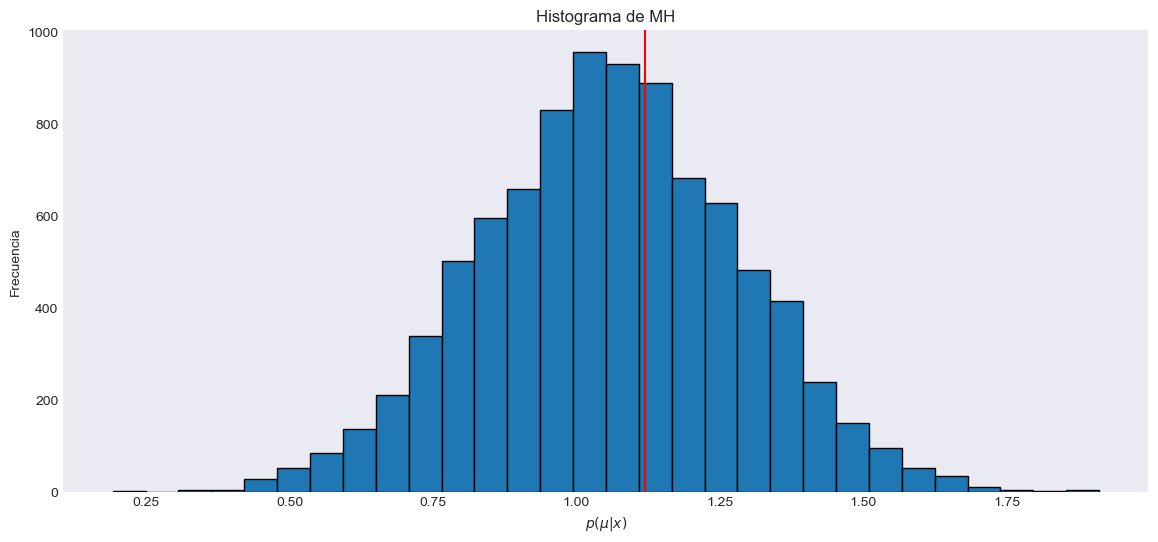

In [20]:
# Graficar muestras
plt.hist(samples, 30, ec='black')
plt.axvline(x=mu_hf_fijo, label=f'$\mu$ = {np.round(mu_hf_fijo, 3)}', c='r')
plt.title(r'Histograma de MH')
plt.ylabel('Frecuencia')
plt.xlabel('$p(\mu|x)$')
#plt.savefig('img3.pdf')
plt.show()

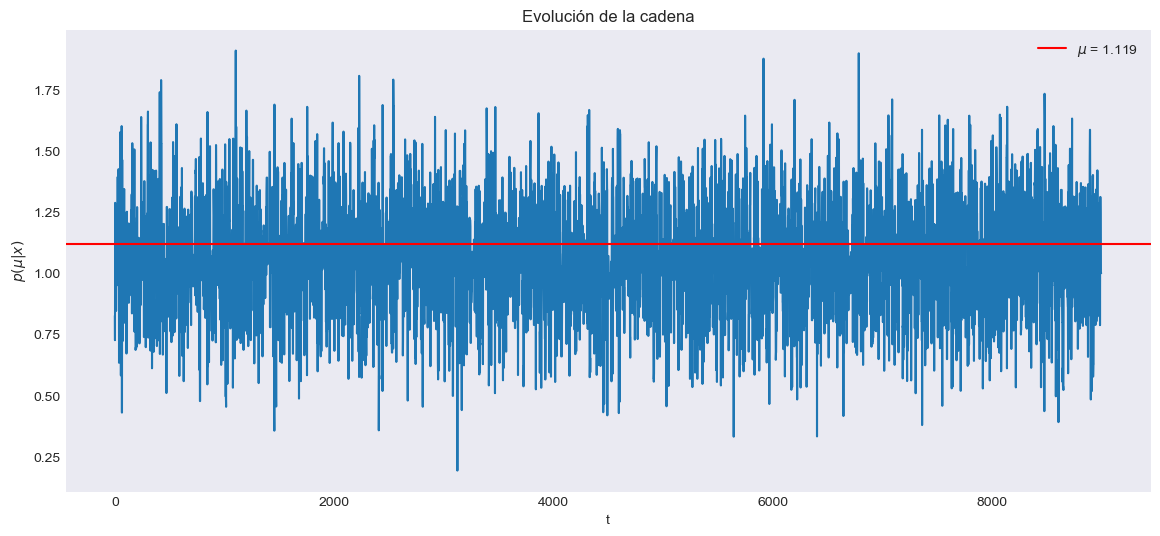

In [21]:
# Gráfico de pasos
plt.plot(range(len(samples)), samples)
plt.axhline(mu_hf_fijo, c='r', label=f'$\mu$ = {np.round(mu_hf_fijo, 3)}')
plt.title('Evolución de la cadena')
plt.legend()
plt.xlabel('t')
plt.ylabel('$p(\mu|x)$')
#plt.savefig('img4.pdf')
plt.show()

## (e)  
Muestre los *samples* de Metropolis-Hastings para distintos valores de $n$ y compare con el $\mu$ real.  
Nota: seleccione muestras de la cadena considerando “thinning” y ”burn in”.

In [22]:
# Semilla
#np.random.seed(204700516)

# Parámetros
lista_n = [10, 50, 100, 300]
initial_state = 3
thinning = 2
m = 1000
burnin = 0.1

# Muestras MH
lista_samples = []
for n in lista_n:
  lista_samples.append(metropolis_hastings(P, Q, initial_state, n, m, burnin=burnin, thinning=thinning))

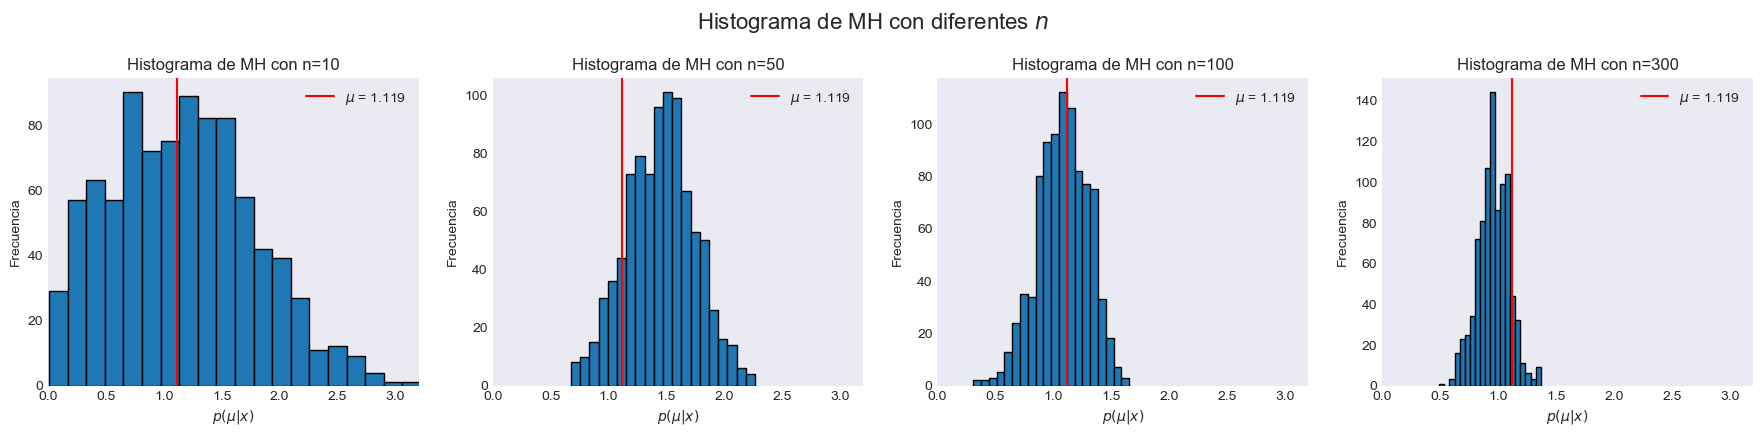

In [23]:
# Graficar muestras
fig, axes = plt.subplots(1, len(lista_n), figsize=(22,4))
fig.suptitle('Histograma de MH con diferentes $n$', fontsize=16, y=1.05)
for i, ax in enumerate(axes.flat):
  ax.hist(lista_samples[i], 20, ec='black')
  ax.axvline(x=mu_hf_fijo, label=f'$\mu$ = {np.round(mu_hf_fijo, 3)}', c='r')
  ax.set_title(f'Histograma de MH con n={lista_n[i]}')
  ax.set_ylabel('Frecuencia')
  ax.set_xlabel('$p(\mu|x)$')
  ax.legend()
  ax.set_xlim(0, 3.2)
#plt.savefig('img5.pdf')
plt.show()

## (f)

En la siguiente celda se generan los parámetros a usar en toda la pregunta. Se definen como constantes los $\lambda$ y los $\mu$ (estos últimos proveniente de una normal).

In [3]:
# Semilla
#np.random.seed(204700516)

# Parámetros
lambda_1 = 0.3
lambda_2 = 0.2
lambda_3 = 0.5
lista_lambdas = np.array([lambda_1, lambda_2, lambda_3])

# Generar mu
mu_norm_1 = np.random.normal(0, 1)
mu_norm_2 = np.random.normal(0, 4)
mu_norm_3 = np.random.normal(0, 5)
mu = np.array([mu_norm_1, mu_norm_2, mu_norm_3])

print('mu_1:', mu_norm_1)
print('mu_2:', mu_norm_2)
print('mu_3:', mu_norm_3)

mu_1: 1.1899822849889006
mu_2: -0.2667729949467154
mu_3: 1.9762388964481103


En la siguiente celda se ven las funciones a utilizar para actualizar el paso de la cadena en Metropolis.

In [4]:
def P_2(x, mu):
  '''
  Distribución target P en 3-D
  '''
  prior = np.log(multivariate_normal(mean=[0,0,0], cov=np.diag([1,4,5])).pdf(mu))
  verosimilitud = np.sum(np.log(norm.pdf(x, loc=sum(mu*lista_lambdas), scale=np.sqrt(5*sum(np.array(lista_lambdas)**2)))))
  return prior + verosimilitud

def Q_2(x, std=0.1):
  '''
  Distribución propuesta Q en 3-D
  '''
  return np.random.normal(x, 1)

Mismo algoritmo de Metrópolis que en la entrega anterior (1 dimensional) pero adaptado para ir actualizando 3 valos de $\mu$ diferentes.

In [5]:
def metropolis_hastings_2(p, q, initial_state, n, m, burnin=0, thinning=1):
  '''
  Algoritmo que entrega m muestras con Metropolis-Hastings usando distribución propuesta q en 3-D
  '''
  lista_xi = np.random.normal(loc=sum(mu*lista_lambdas), scale=np.sqrt(5*sum(np.array(lista_lambdas)**2)), size=n)

  samples = [initial_state]

  for i in range(1, m*thinning):
    mu_actual = samples[-1]
    mu_c = q(mu_actual)
    p_mu_i = p(lista_xi, mu_actual)
    p_mu_c = p(lista_xi, mu_c)
    ratio = min(np.exp(np.array(p_mu_c) - np.array(p_mu_i)), 1)
    u = np.random.uniform(0, 1)
    #print('(ratio , u) :', ratio, u)

    if ratio > u:
      samples.append(mu_c)

    else:
      samples.append(mu_actual)

  # Burn in y thinning
  samples = samples[::thinning]
  idx_burnin = int(len(samples)*burnin)
  samples = samples[idx_burnin:]
  return samples

Iniciar el algoritmo:

In [6]:
# Parámetros
initial_state = np.array([1,1,1])
n = 200
m = 5000
thinning = 2
burnin = 0.2

# Muestras
samples_2 = metropolis_hastings_2(P_2, Q_2, initial_state, n, m)

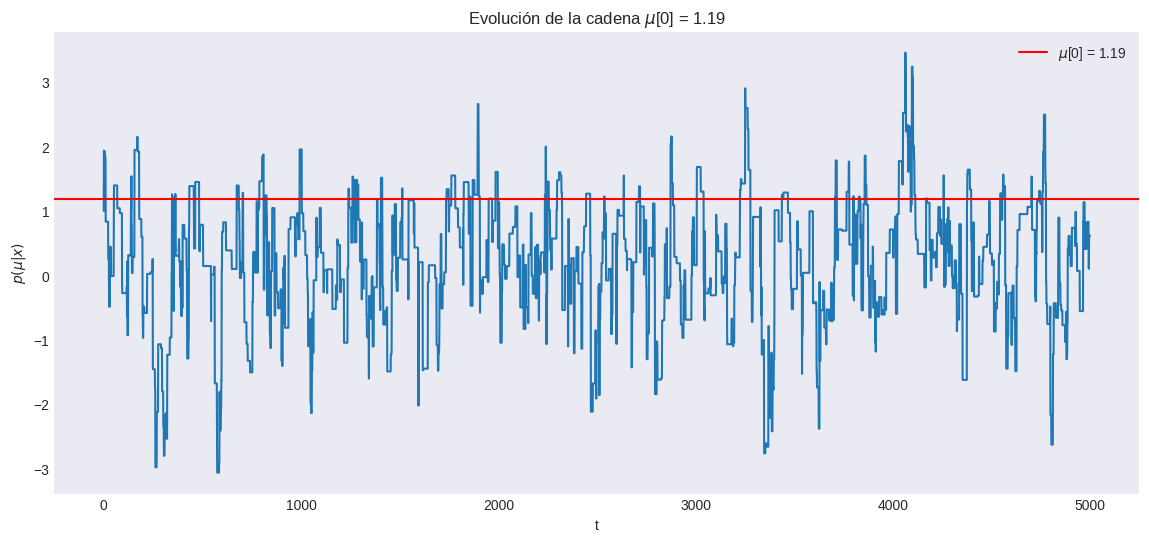

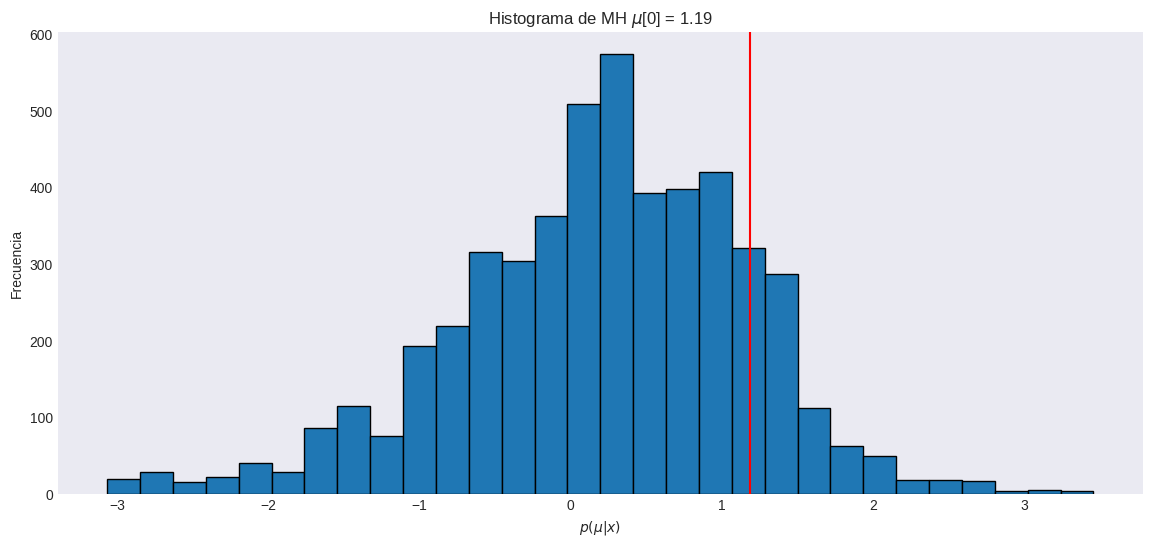

In [7]:
# Gráfico de pasos PRIMERA COORDENADA DE MU
plt.plot(range(len([item[0] for item in samples_2])), [item[0] for item in samples_2])
plt.axhline(mu[0], c='r', label=f'$\mu$[0] = {np.round(mu[0], 3)}')
plt.title(f'Evolución de la cadena $\mu$[0] = {np.round(mu[0], 3)}')
plt.legend()
plt.xlabel('t')
plt.ylabel('$p(\mu|x)$')
#plt.savefig('img1.pdf')
plt.show()

# Graficar muestras
plt.hist([item[0] for item in samples_2], 30, ec='black')
plt.axvline(x=mu[0], label=f'$\mu$ = {np.round(mu[0], 3)}', c='r')
plt.title(f'Histograma de MH $\mu$[0] = {np.round(mu[0], 3)}')
plt.ylabel('Frecuencia')
plt.xlabel('$p(\mu|x)$')
#plt.savefig('img3.pdf')
plt.show()

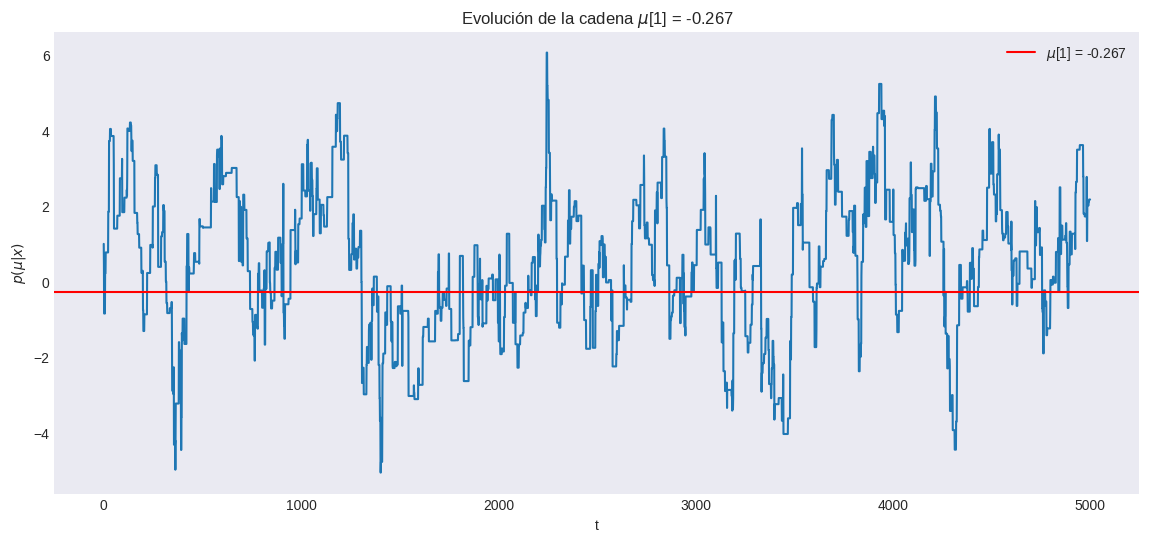

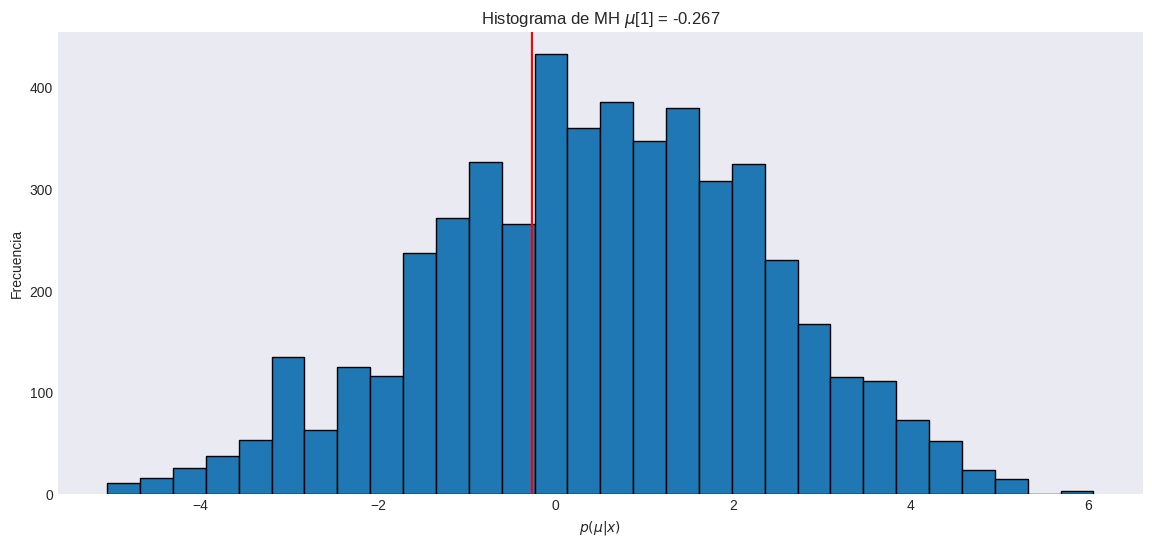

In [8]:
# Gráfico de pasos SEGUNDA COORDENADA DE MU
plt.plot(range(len([item[1] for item in samples_2])), [item[1] for item in samples_2])
plt.axhline(mu[1], c='r', label=f'$\mu$[1] = {np.round(mu[1], 3)}')
plt.title(f'Evolución de la cadena $\mu$[1] = {np.round(mu[1], 3)}')
plt.legend()
plt.xlabel('t')
plt.ylabel('$p(\mu|x)$')
#plt.savefig('img2.pdf')
plt.show()

# Graficar muestras
plt.hist([item[1] for item in samples_2], 30, ec='black')
plt.axvline(x=mu[1], label=f'$\mu$ = {np.round(mu[1], 3)}', c='r')
plt.title(f'Histograma de MH $\mu$[1] = {np.round(mu[1], 3)}')
plt.ylabel('Frecuencia')
plt.xlabel('$p(\mu|x)$')
#plt.savefig('img3.pdf')
plt.show()

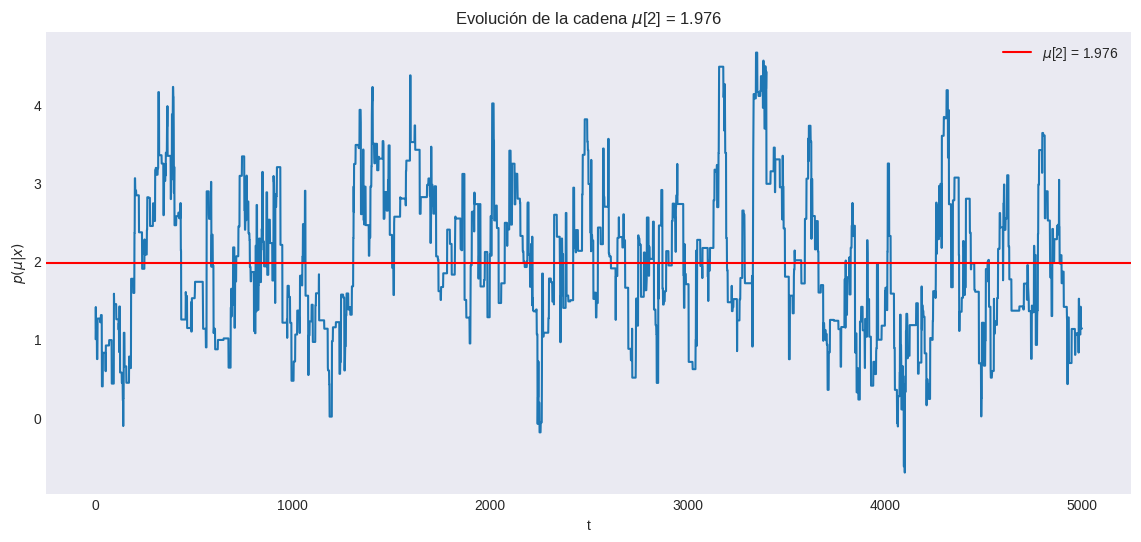

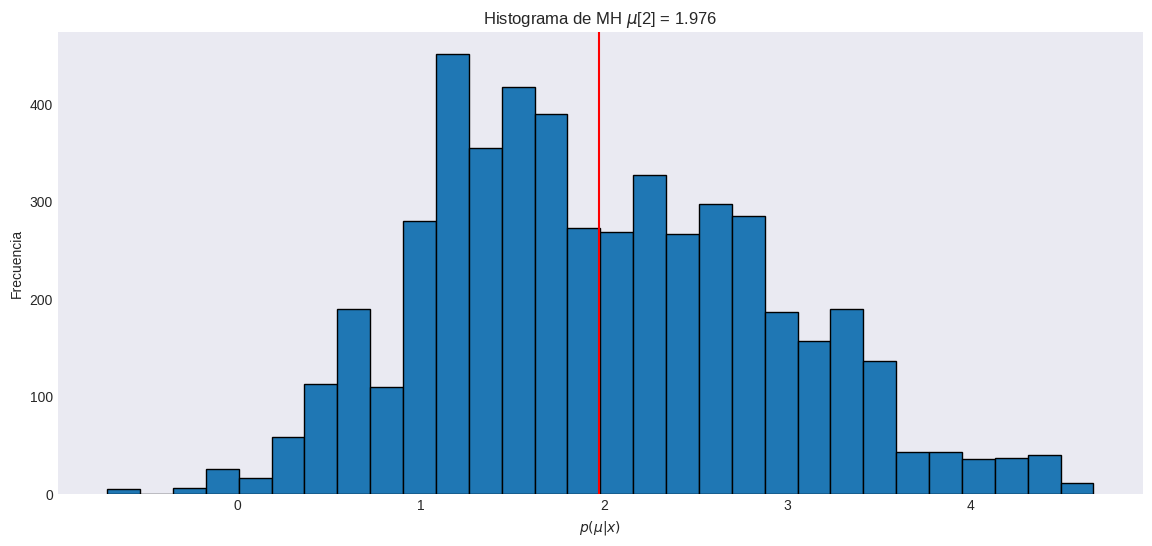

In [9]:
# Gráfico de pasos TERCERA COORDENADA DE MU
plt.plot(range(len([item[2] for item in samples_2])), [item[2] for item in samples_2])
plt.axhline(mu[2], c='r', label=f'$\mu$[2] = {np.round(mu[2], 3)}')
plt.title(f'Evolución de la cadena $\mu$[2] = {np.round(mu[2], 3)}')
plt.legend()
plt.xlabel('t')
plt.ylabel('$p(\mu|x)$')
#plt.savefig('img3.pdf')
plt.show()

# Graficar muestras
plt.hist([item[2] for item in samples_2], 30, ec='black')
plt.axvline(x=mu[2], label=f'$\mu$ = {np.round(mu[2], 3)}', c='r')
plt.title(f'Histograma de MH $\mu$[2] = {np.round(mu[2], 3)}')
plt.ylabel('Frecuencia')
plt.xlabel('$p(\mu|x)$')
#plt.savefig('img3.pdf')
plt.show()

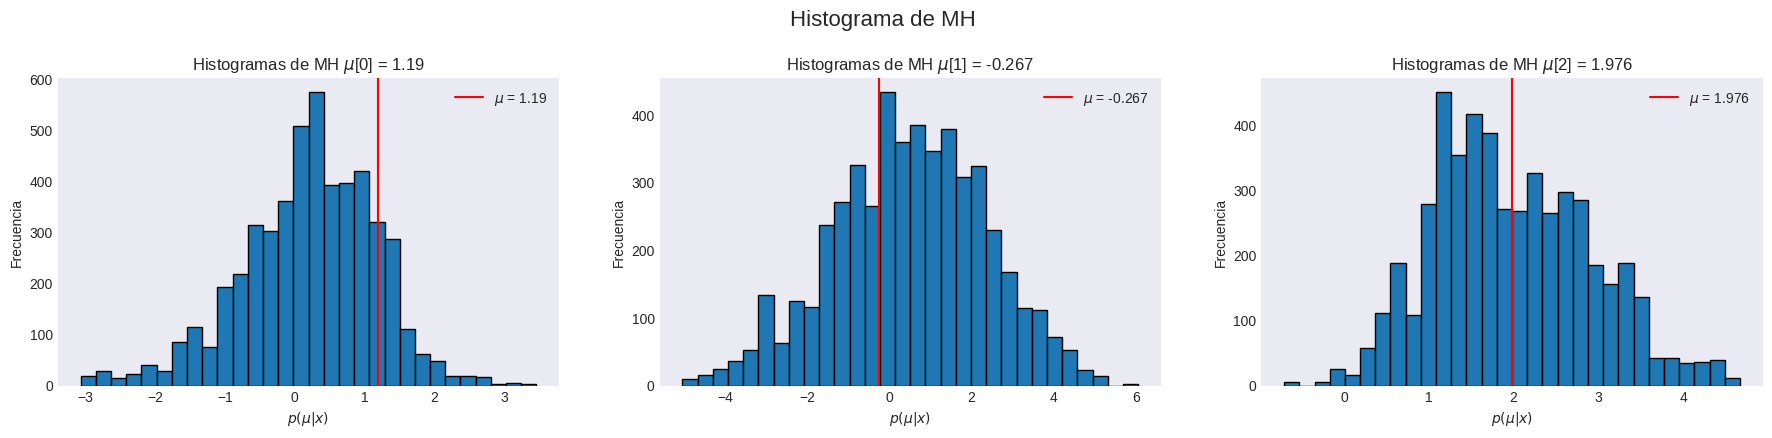

In [10]:
# Gráficos juntos
fig, axes = plt.subplots(1, 3, figsize=(22,4))
fig.suptitle('Histograma de MH', fontsize=16, y=1.05)
for i, ax in enumerate(axes.flat):
  ax.hist([item[i] for item in samples_2], 30, ec='black')
  ax.axvline(x=mu[i], label=f'$\mu$ = {np.round(mu[i], 3)}', c='r')
  ax.set_title(f'Histogramas de MH $\mu$[{i}] = {np.round(mu[i], 3)}')
  ax.set_ylabel('Frecuencia')
  ax.set_xlabel('$p(\mu|x)$')
  ax.legend()
#plt.savefig('img5.pdf')
plt.show()

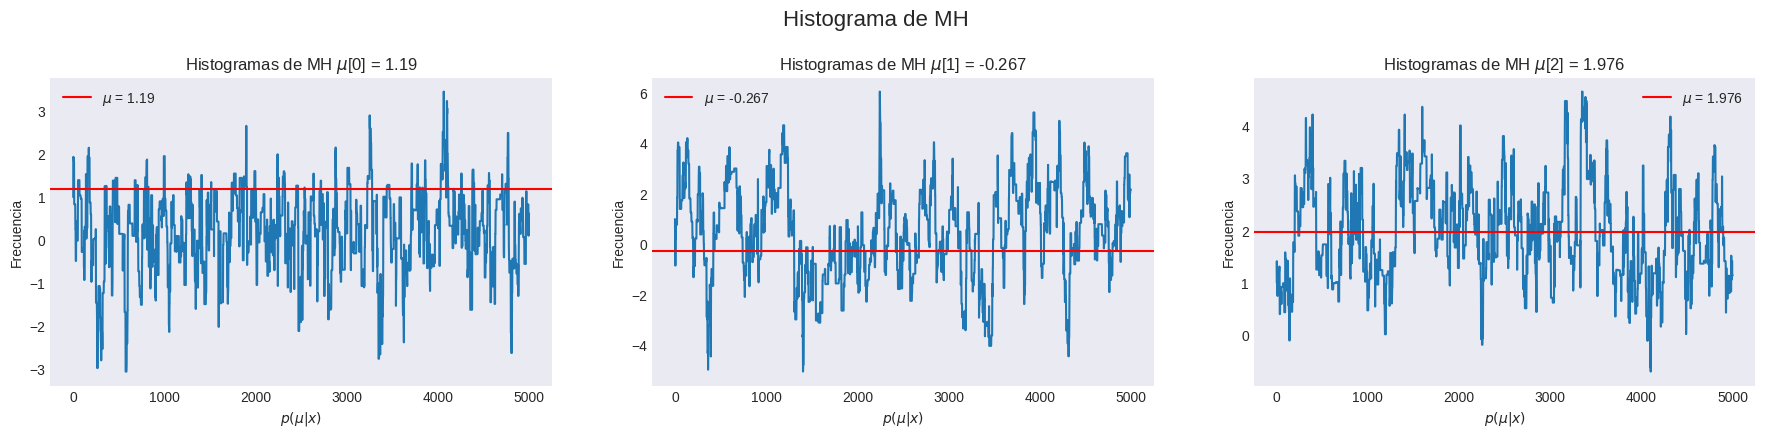

In [11]:
# Gráficos juntos
fig, axes = plt.subplots(1, 3, figsize=(22,4))
fig.suptitle('Histograma de MH', fontsize=16, y=1.05)
for i, ax in enumerate(axes.flat):
  ax.plot(range(len([item[i] for item in samples_2])), [item[i] for item in samples_2])
  ax.axhline(mu[i], label=f'$\mu$ = {np.round(mu[i], 3)}', c='r')
  ax.set_title(f'Histogramas de MH $\mu$[{i}] = {np.round(mu[i], 3)}')
  ax.set_ylabel('Frecuencia')
  ax.set_xlabel('$p(\mu|x)$')
  ax.legend()
  #ax.set_xlim(0, 3.2)
#plt.savefig('img5.pdf')
plt.show()

Acá en los gráficos se puede ver como la cadena evoluciona de manera que va aproximando al $\mu$ correspondiente, sin embargo, no lo hace con extrema precisión. Esto se puede deber a la cantidad de $n$ o $m$ asignada en el código. Por otro lado, estos algoritmos siempre son sensibles a temas random y puntos iniciales.  

En conclusión, se logra la convergencia esperada pero con una posibilidad grande de mejora.

# P2

## (a)

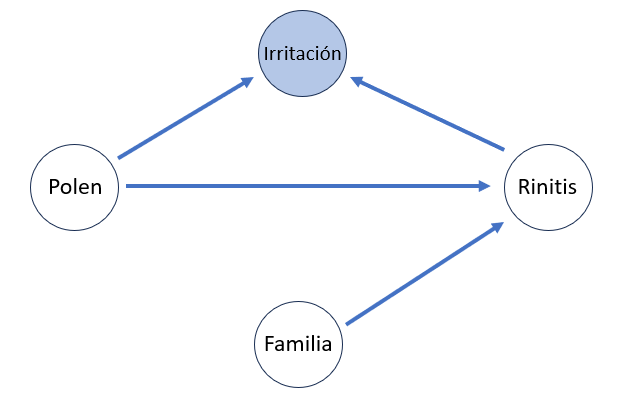

En este modelo gráfico, las variables son Polen (P), Familia (F), Irritación (I) y la Rinitis Alérgica (R). Cada una de estas es binaria, es decir, toma solo valores {0,1} que pueden indicar la presencia o no de un evento.  
Por otro lado, como suposición, se indica que solamente la irritación es una variable observable. Debido a lo anterior es que está en un nodo más oscuro.  

Por último, las relaciones son las siguientes:


*   Si hay una gran cantidad de polen, es probable que haya irritación.
*   Si hay una gran cantidad de polen, es probable que haya Rinitis.
*   Si tengo un familiar con Rinitis, esta puede heredar a mi.
*   Si tengo Rinitis, es probable que haya irritación.  

Por otro lado, notar que en toda esta pregunta, las probabilidades conocidas son aquellas que no dependen de otra variable (por ejemplo, polen y familia) junto con las probabilidades condicionadas (por ejemplo, rinitis dado polen y familia, pero no rinitis dado familia solamente).


---



$
\displaystyle
\mathbb{P}(R | I) = \frac{\mathbb{P}(I|R) \mathbb{P}(R)}{\mathbb{P}(I)} \quad \text{Por teorema de Bayes}
$

Luego, estas probabilidades se calculan como sigue:  

$
\displaystyle
\mathbb{P}(I|R) = \mathbb{P}(I| R, P=0)\mathbb{P}(P=0) + \mathbb{P}(I| R, P=1)\mathbb{P}(P=1) \\
\mathbb{P}(R) = \displaystyle\sum_{i,j} \mathbb{P}(R|P=i, F=j) \mathbb{P}(P=i) \mathbb{P}(F=j) \\
\mathbb{P}(I) = \displaystyle\sum_{i,j} \mathbb{P}(R|P=i, F=j) \mathbb{P}(P=i) \mathbb{P}(R=j)
$

Notar que para el último cálculo se está el término $\mathbb{P}(R=j)$ donde habría que reemplazar con la segunda ecuación descrita, sin embargo, a modo de simplificar las expresiones lo dejaremos de esta forma.  
Por otro lado, como $P$ no depende de $R$, no aparece en las probabilidades condicionales. También notar que las sumas en $i,j$ son tomando valores {0,1}.  

Con esto, queda todo en probabilidades conocidas, es decir, la del polen, la de familia, la de irritación dado rinitis y la de rinitis dado el polen y la familia.


---



## (c)
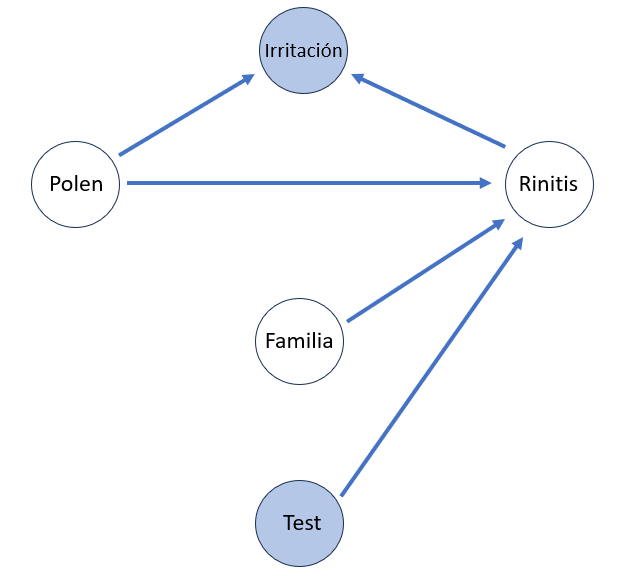

Como se puede ver en el esquema, se agrega simplemente el nodo que representa al test de alergia (T), donde su resultado es algo visible y afecta directamente a la probabilidad de poseer rinitis.  
Suponiendo nuevamente esta nueva variabe como una binaria, la probabilidad de tener Rinitis Alérgica queda:  

$
\mathbb{P}(R) = \displaystyle \sum_{i,j,k} \mathbb{P}(R|P=i, F=j, T=k) \mathbb{P}(P=i) \mathbb{P}(F=j) \mathbb{P}(T=k)
$

Donde nuevamente las sumas toman valores $i,j,k = 0,1$.


---



## (d)

La distribución de polen ahora es continua y está dada por una distribución *half-normal*. Esto pues asumimos que el polen no puede tener valores negativos (descartando así distribuciones que tengan valores en los negativos).  
En la práctica, una distribución *half-normal* se ve como sigue:

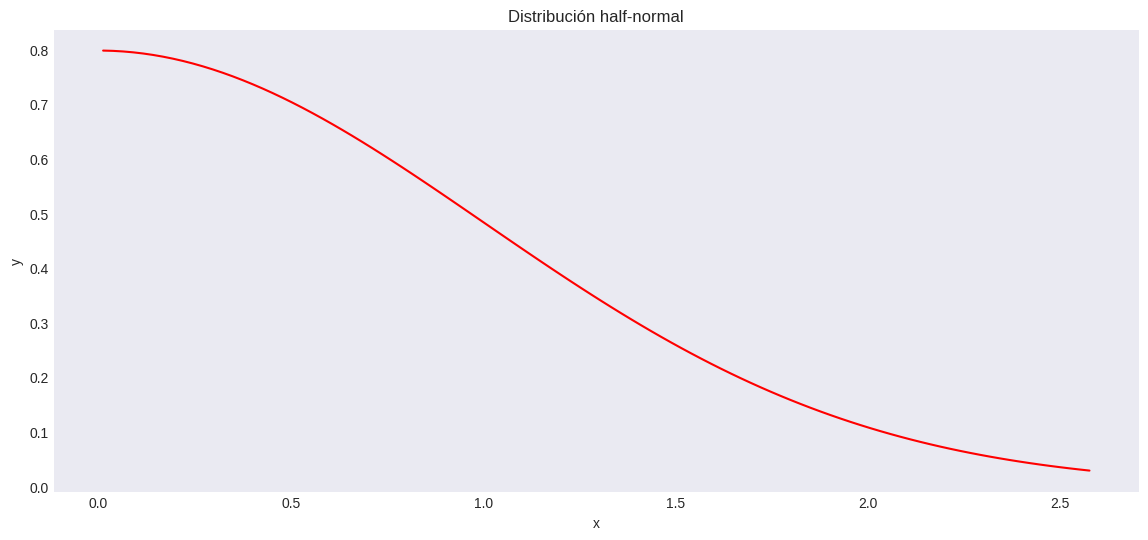

In [12]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(sp.stats.halfnorm.ppf(0.01),
                sp.stats.halfnorm.ppf(0.99), 100)
ax.plot(x, sp.stats.halfnorm.pdf(x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribución half-normal')
plt.show()

Al ser esta ahora una distribución continua, las sumatorias que se tenían antes en donde se involucraba la variable del polen pasarán a ser integrales. Este es el único cambio que existe en la práctica si consideramos variables continuas (obviando la dificultad agregada de pasar de una suma a una integral).


---



## (e)

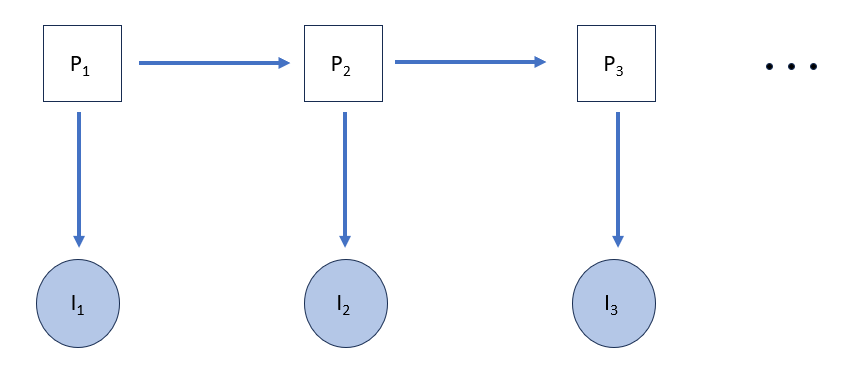

Tal como está planteado el modelo, es una HMM donde las variables observadas sigue siendo la irritación. Podemos pensar en la cadena de Markov $X_t$ que represente la cantidad de polen cada 30 minutos. Así, del modelo conocemos $\mathbb{P}(I=i | X_t=p)$, el punto inicial $\mathbb{P}(X_t = X_0)$ y que, dada la propiedad de Markov, $\mathbb{P}(X_{t+1} = x_{t+1} | X_t = x_t)$.  

Por último, lo que se quiere es predecir la cantidad de polen. Esto se traduce a calcular $\mathbb{P}(X_t | I_{1:t})$ por lo que se puede usar el algoritmo de Metropolis-Hastings para samplear los datos y obtener la distribución.


---



# P3

## (a)

Para la programación del solver con scipy, se deben escribir las matrices en formato de vectores. Con esto, se deben crear matrices $C, w, Z$ donde $C$ sea la matriz de costo ($n \times m$), y $w, Z$ sean tales que $ZP = w$. Con ello, la matriz $Z$ es de $(n+m) \times (nm)$ y $w$ es de $n+m$.  

Así,  
$
w = \begin{pmatrix}
a_1,..., a_n, b_1,...,b_m
\end{pmatrix}^T \\
P = \begin{pmatrix}
P_{11},..., P_{1m},...,P_{nm}
\end{pmatrix}^T \\
Z = \begin{pmatrix}
A_1 | A_2 |...|A_m \\
I_m | I_m |...|I_m
\end{pmatrix}^T \text{donde } A_i = \begin{pmatrix}
0, ..., 0 \\
\vdots \\
1, ..., 1 \\
\vdots \\
0, ..., 0
\end{pmatrix} \text{Donde hay 1's en la fila i (notar que $A_i$ es de $n \times m$)}
$  



In [13]:
def Crear_Matriz_1s(fila, n, m):
  '''
  Función para crear matriz de filas de 1's en la variable fila
  '''
  matriz = [[0] * (m) for _ in range(n)]
  for j in range(m):
    matriz[fila][j] = 1
  return np.array(matriz)

In [14]:
def transporte_optimo(x, y, a, b):
  '''
  Función que resuelve el OT dado x,y y distribuciones a,b
  '''
  # Ver dimensiones de x,y pues C se calcula diferente
  try:
    aux = x.shape[1]
    aux2 = y.shape[1]
    C = sp.spatial.distance_matrix(x, y, p=2)**2 # matriz
  except:
    C = sp.spatial.distance_matrix(x.reshape(-1,1),y.reshape(-1,1), p=2)**2 # vector

  # Vectorizar C
  C = C.flatten()

  # Concatenar a y b
  w = np.concatenate((a,b), axis=0)

  # Crear matrices de 1's e identidad para scipy linprog
  lista_A = []
  for i in range(n):
    lista_A.append(Crear_Matriz_1s(i, n, m))
  I = np.eye(m)

  bloques_arriba = lista_A[0]
  bloques_abajo = I

  for i in range(1, n):
    bloques_arriba = np.concatenate((bloques_arriba, lista_A[i]), axis=1)
    bloques_abajo = np.concatenate((bloques_abajo, I), axis=1)

  # Concatenar las matrices por bloques
  Z = np.concatenate((bloques_arriba, bloques_abajo), axis=0)

  # Cotas inf y sup
  bounds = (0, None)

  # Valor de linprog
  val = sp.optimize.linprog(C, A_eq=Z, b_eq=w, bounds=bounds)

  return val



---



## (c)

In [15]:
# Parámetros OT en 1 dim
n = 30
m = 50
a = np.array([1/n] * n)
b = np.array([1/m] * m)

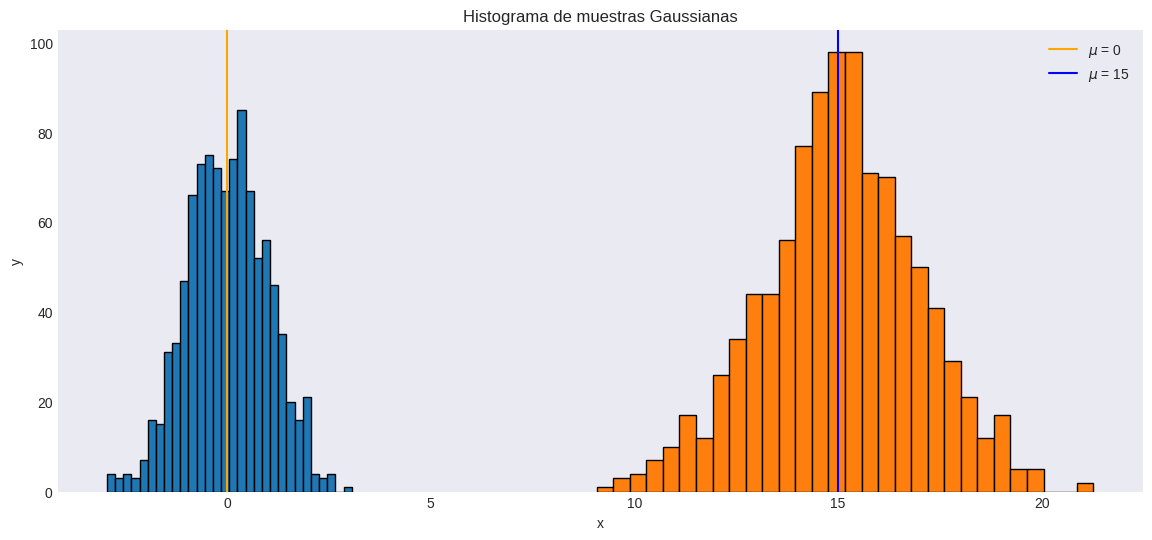

In [16]:
# Parámetros de x,y
mu_1 = 0
sigma_1 = 1
mu_2 = 15
sigma_2 = 2

x = np.random.normal(mu_1, sigma_1, 1000)
y = np.random.normal(mu_2, sigma_2, 1000)

# Gráficos
plt.hist(x, 30, ec='black')
plt.hist(y, 30, ec='black')
plt.axvline(x=mu_1, label=f'$\mu$ = {np.round(mu_1, 3)}', c='orange')
plt.axvline(x=mu_2, label=f'$\mu$ = {np.round(mu_2, 3)}', c='b')
plt.title(r'Histograma de muestras Gaussianas')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
#plt.savefig('imgp3_1.pdf')
plt.show()

Este gráfico fue hecho con más samples para dar una mejor forma a la curva gaussiana, sin embargo, para el cálculo del transporte óptimo se usarán $n$ samples de $x$ y $m$ samples de $y$.

In [17]:
# Valor teórico
def OT_teorico_1D(x, mu_1, mu_2, sigma_1, sigma_2):
  return (mu_1 - mu_2)**2 + sigma_1 + sigma_2 - 2*np.sqrt(sigma_1*sigma_2)

In [18]:
# Definir x,y mediante distribuciones N(mu_i, sigma_i) con n y m samples respectivamente
np.random.seed(20470051)

x = np.random.normal(mu_1, sigma_1, n)
y = np.random.normal(mu_2, sigma_2, m)

x_sort = np.sort(x)
y_sort = np.sort(y)

In [19]:
# OT
ot_1 = transporte_optimo(x,y,a,b)
ot_sort = transporte_optimo(x_sort,y_sort,a,b)
ot_1

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 227.46200736360925
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            nit: 769
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 1.364e+00  6.246e-01 ...  4.832e-01
                              4.151e-01]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
                 marginals: [ 1.199e+01 -2.015e+01 ...  1.941e+02
                              1.966e+02]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mi

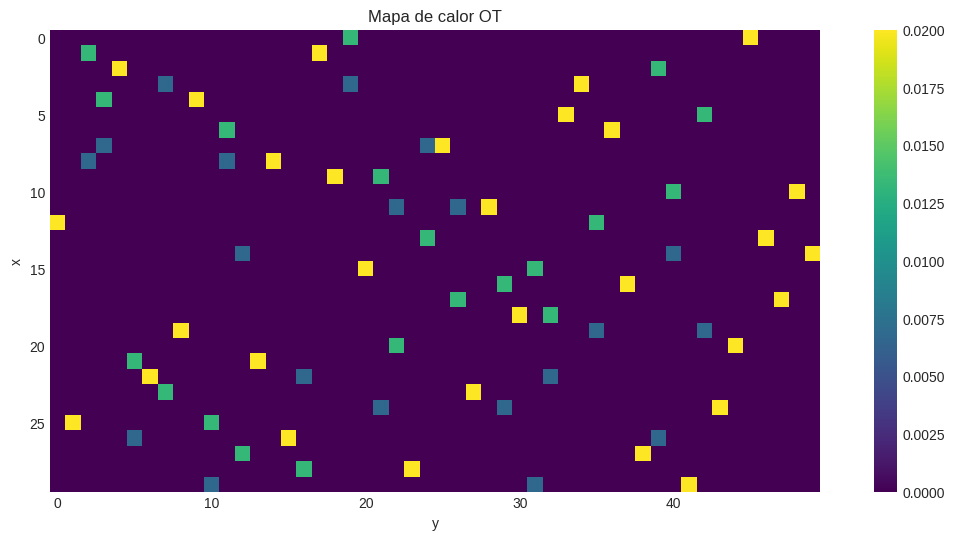

In [31]:
# Graficar OT con heatmap
plt.imshow(ot_1.x.reshape(n,m), cmap='viridis')
plt.title('Mapa de calor OT')
plt.ylabel('x')
plt.xlabel('y')
plt.colorbar()
#plt.savefig(')
plt.show()

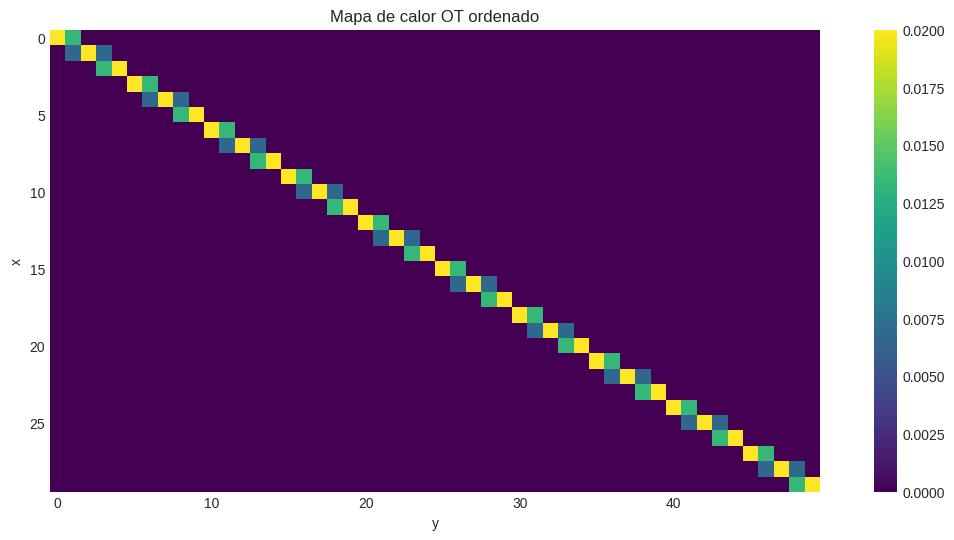

In [32]:
# Graficar OT con heatmap
plt.imshow(ot_sort.x.reshape(n,m), cmap='viridis')
plt.title('Mapa de calor OT ordenado')
plt.ylabel('x')
plt.xlabel('y')
plt.colorbar()
#plt.savefig(')
plt.show()

In [22]:
# OT teórico
ot_teo = OT_teorico_1D(x, mu_1, mu_2, sigma_1, sigma_2)
print('Transporte óptimo analítico en 1-D:', ot_teo)

Transporte óptimo analítico en 1-D: 225.17157287525382


Como se puede ver, el valor teórico calza con el valor objetivo de la función entregada por el programa lineal de scipy por una diferencia pequeña para los valores de $n$ y $m$ considerados (esto debido el tiempo y memoria que requiere el código).


---



## (d)

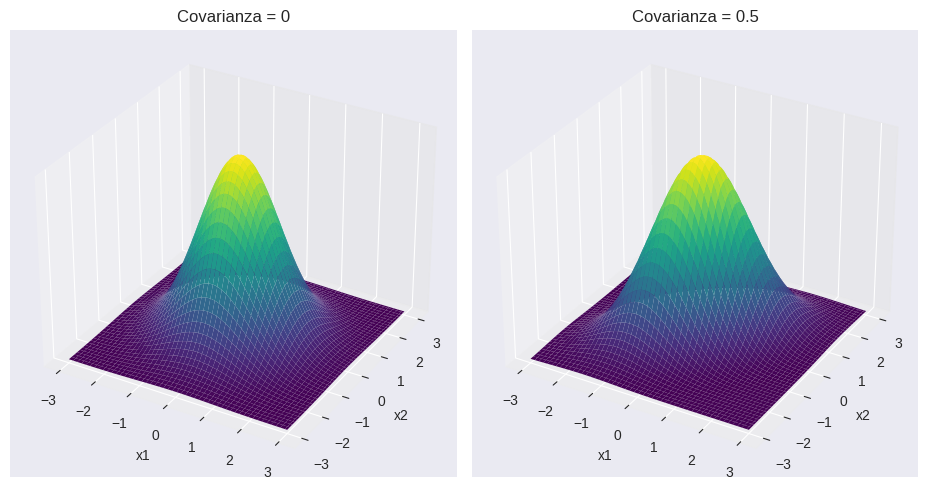

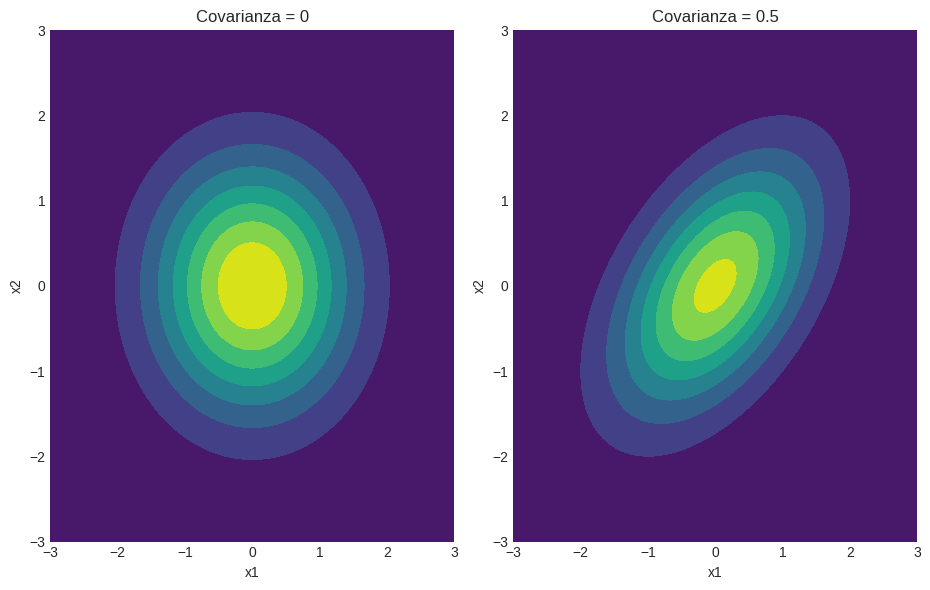

In [23]:
# Celda para graficar sampleos de gaussianas 2d

mu_2d = np.array([0, 0])
cov_2d = [0, 0.5]
pdf_list = []

fig = plt.figure()

for idx, val in enumerate(cov_2d):
    cov = np.array([[1, val], [val, 1]])
    distr = sp.stats.multivariate_normal(cov = cov, mean = mu_2d)

    mean_1, mean_2 = mu_2d[0], mu_2d[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]

    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)

    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covarianza = {cov_2d[idx]}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covarianza = {cov_2d[idx]}')
plt.tight_layout()
plt.show()

Al igual que antes, estos gráficos fueron hechos con el objetivo de ver la forma gaussiana en dos dimensiones, sin embargo, para el cálculo del transporte óptimo se usarán las dimensiones adecuadas para el PL, es decir, $n, m$.

In [24]:
# Parámetros OT en 2 dim
n = 30
m = 50
a = np.array([1/n] * n)
b = np.array([1/m] * m)

mu_2d_1 = np.array([0, 0])
cov_1 = np.diag([1,4])

mu_2d_2 = np.array([1, 1])
cov_2 = np.diag([3,5])

In [25]:
# Definir x,y en normal 2-d
x_2 = np.random.multivariate_normal(mean=mu_2d_1, cov=cov_1, size=n)
y_2 = np.random.multivariate_normal(mean=mu_2d_2, cov=cov_2, size=m)

In [26]:
# OT
ot_2 = transporte_optimo(x_2,y_2,a,b)
ot_2

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 2.6955540149814357
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  6.667e-03]
            nit: 226
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              6.667e-03]
                 marginals: [ 1.149e+01  2.161e+00 ...  2.175e+01
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
                 marginals: [-3.116e+00 -7.075e-01 ...  8.832e+00
                              4.608e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mi

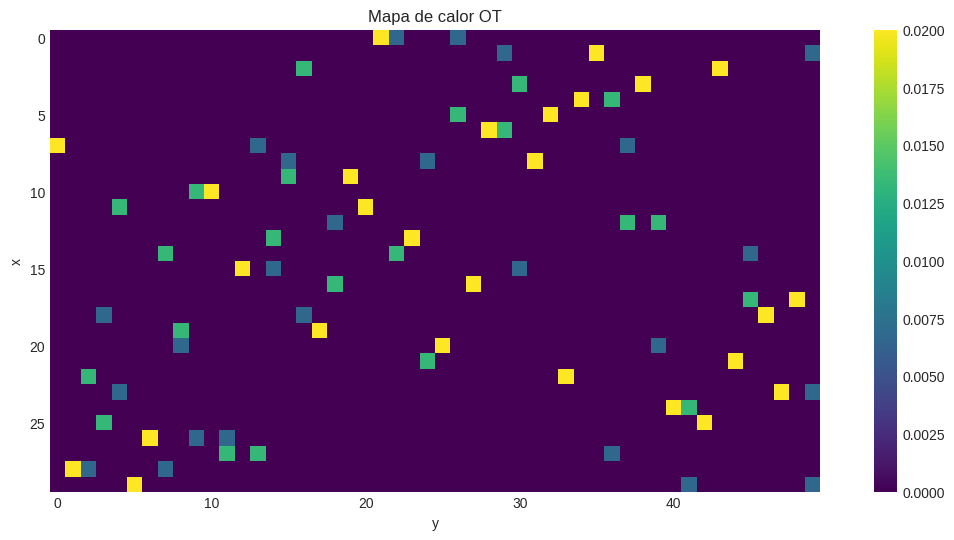

In [27]:
# Graficar OT con heatmap
plt.imshow(ot_2.x.reshape(n,m), cmap='viridis')
plt.title('Mapa de calor OT')
plt.ylabel('x')
plt.xlabel('y')
plt.colorbar()
#plt.savefig(')
plt.show()



---



## (e)

In [28]:
# Definir pasos t_i
lista_t = np.linspace(0, 1, num=20)

# Matriz P del algoritmo y epsilon
P = ot_1.x.reshape(n,m)
eps = 0.0001

# Lista de x_i, y_i > 0
x_pos = []
y_pos = []

# Obtener x_i e y_i mayores a eps
for i in range(n):
  for j in range(m):
    if P[i][j] > eps:
      x_pos.append(x_2[i])
      y_pos.append(y_2[j])

x_pos = np.array(x_pos)
y_pos = np.array(y_pos)

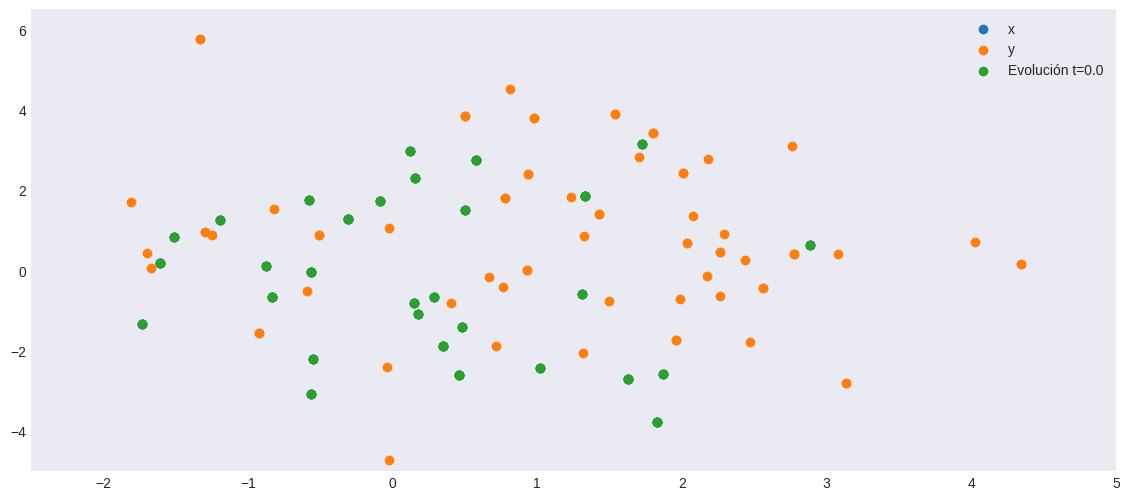

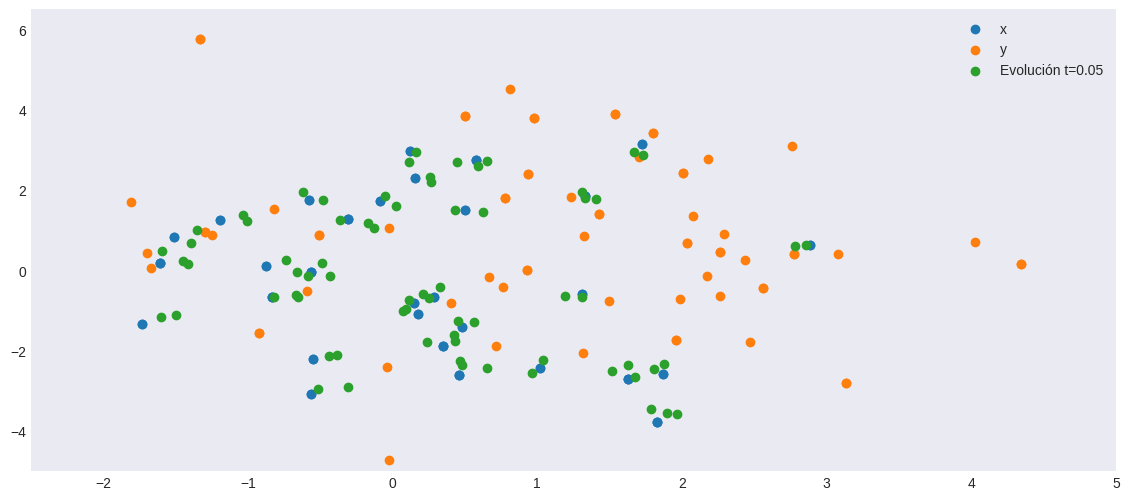

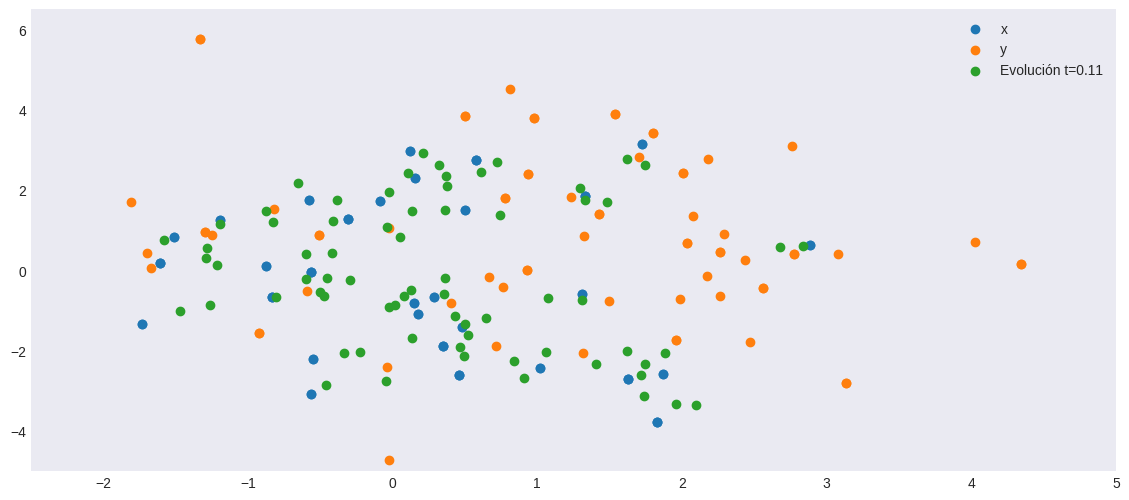

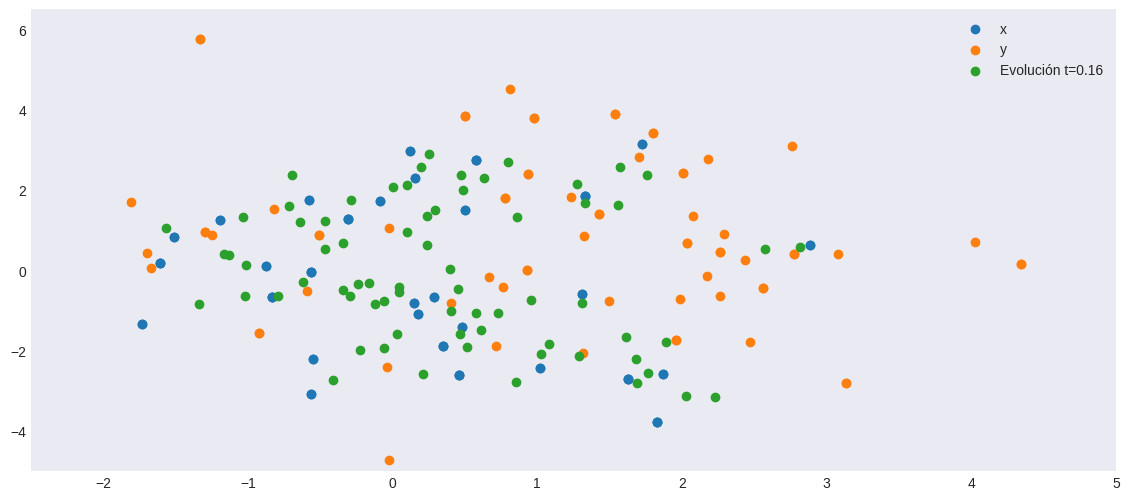

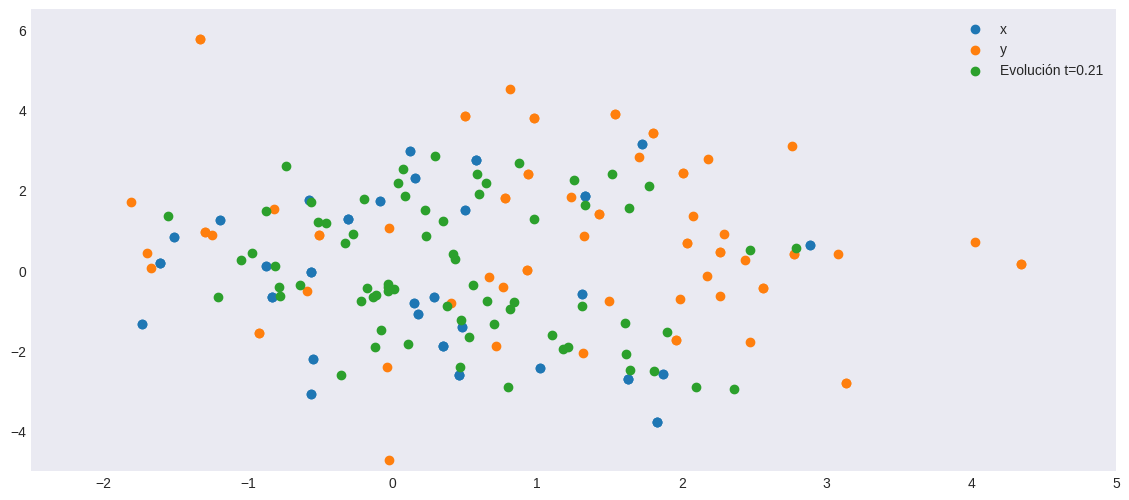

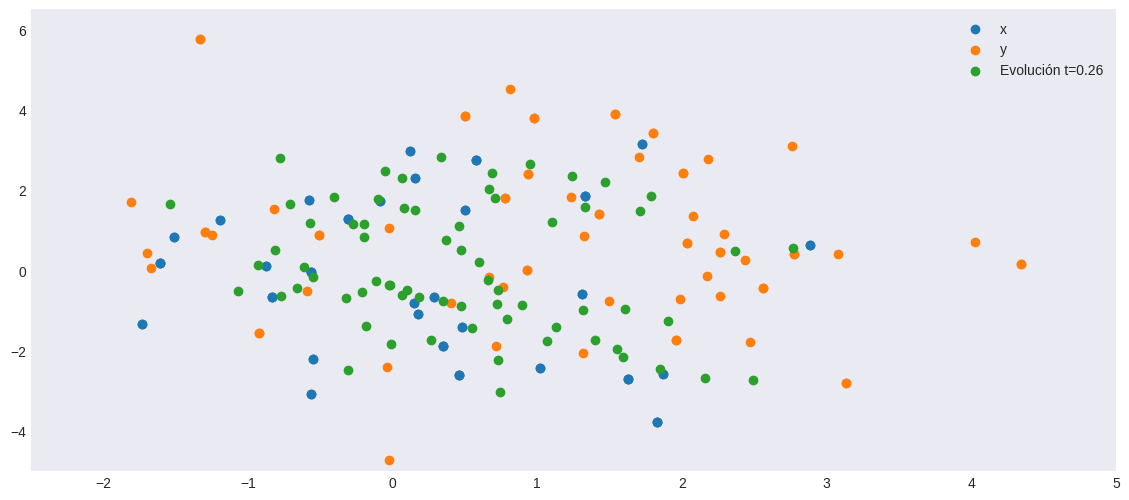

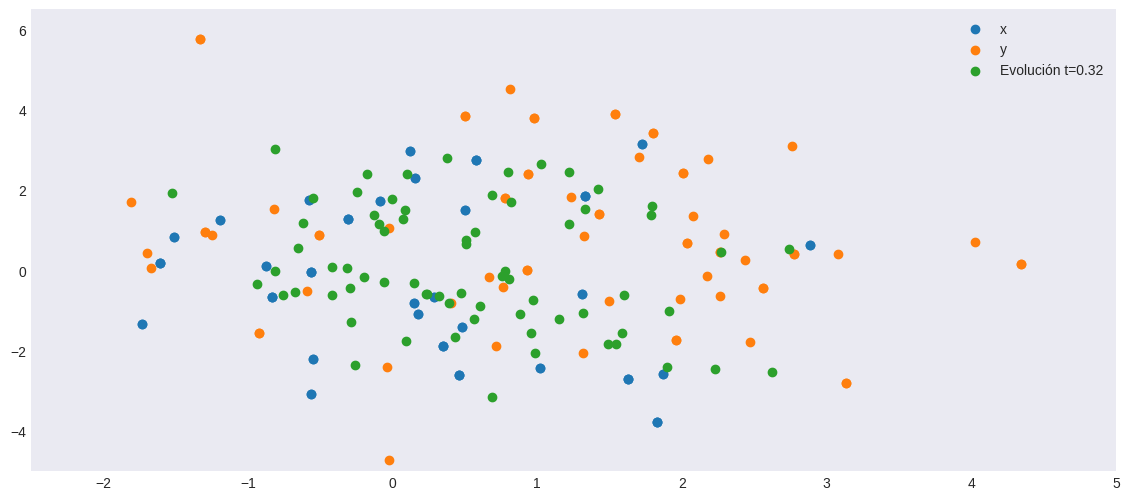

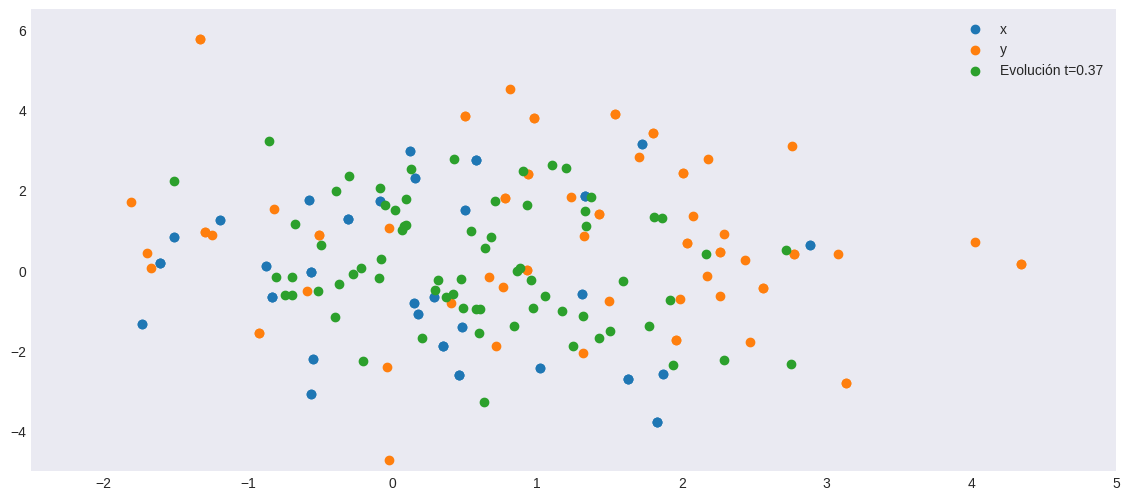

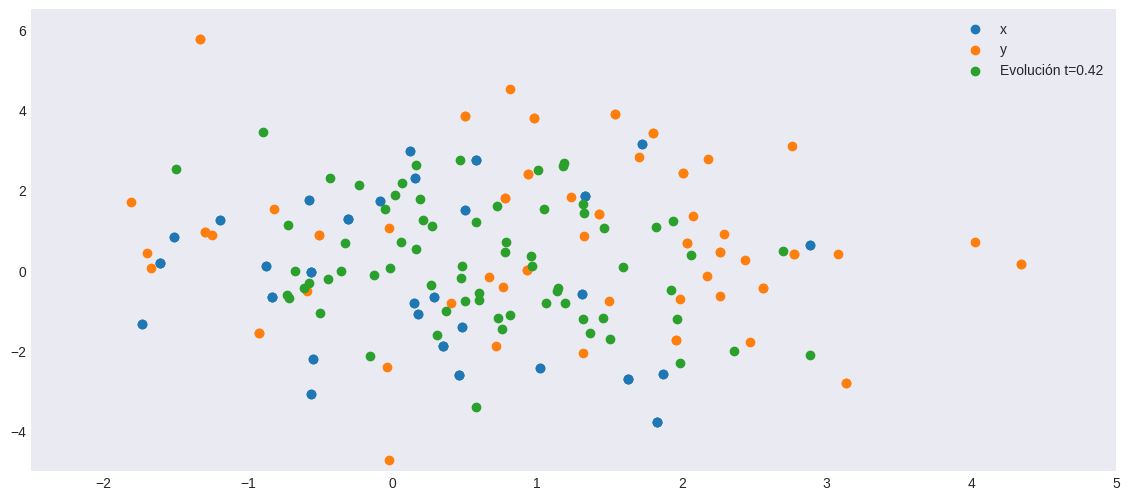

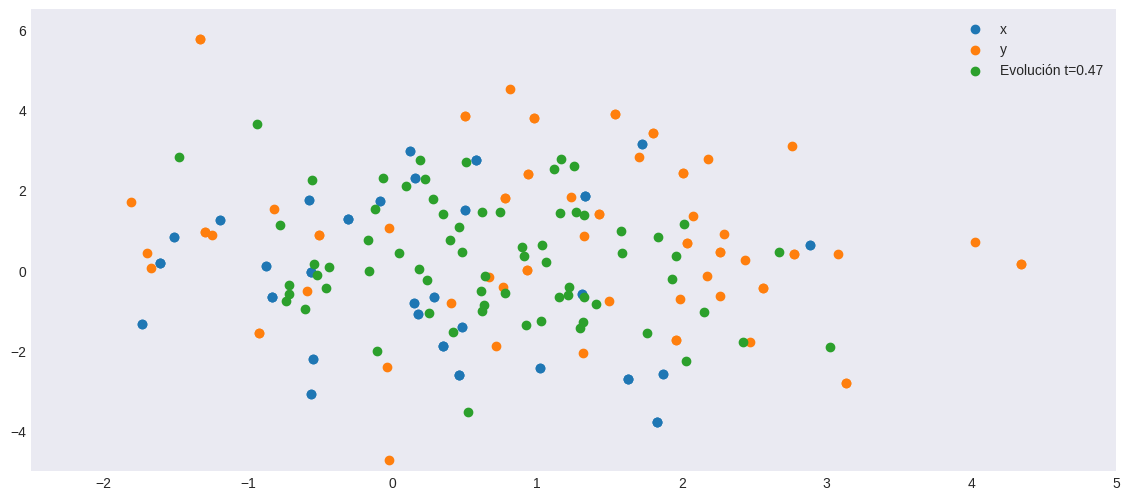

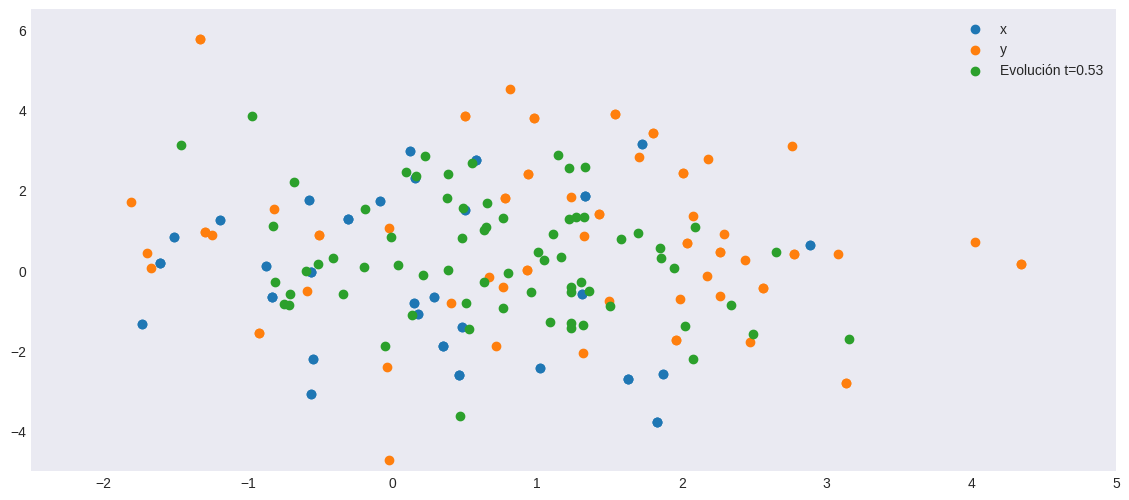

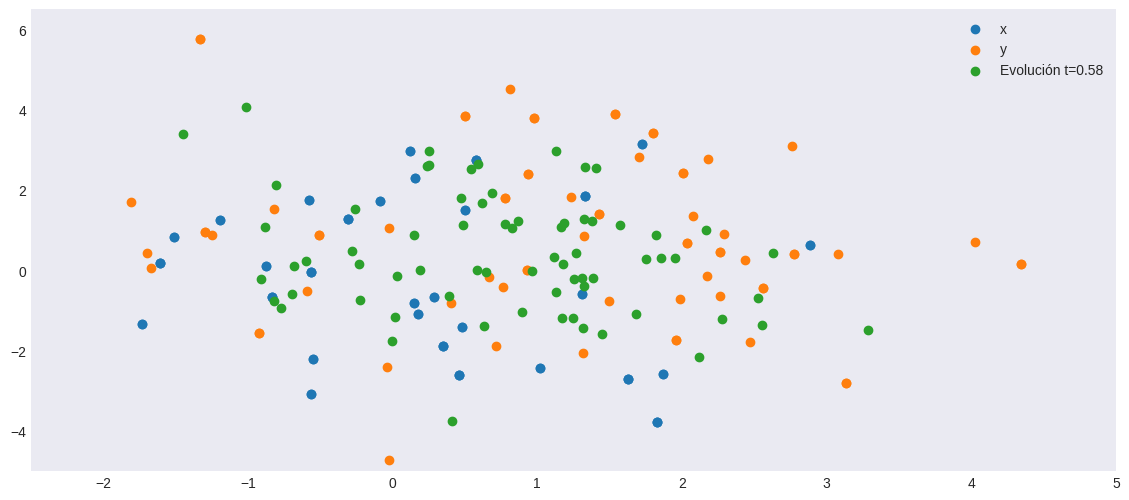

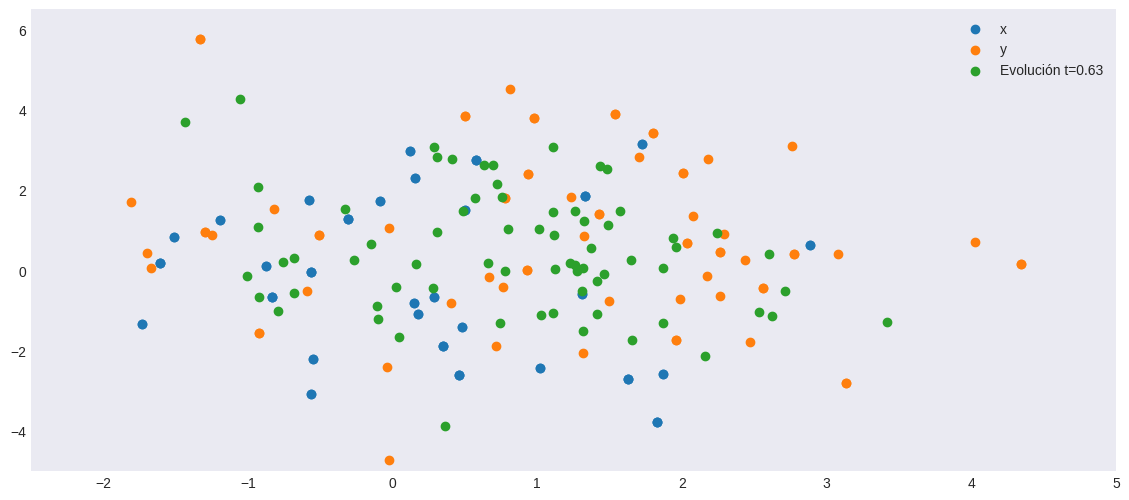

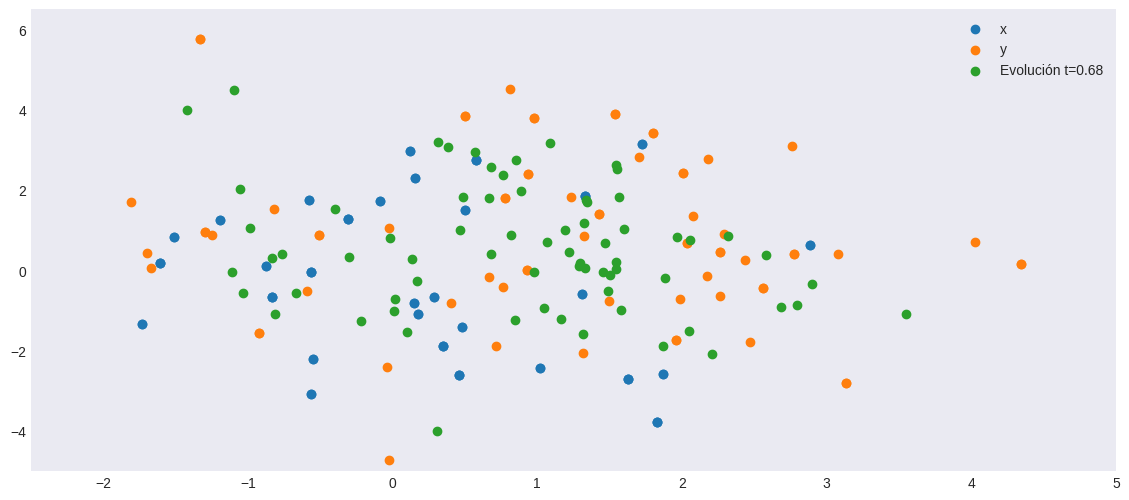

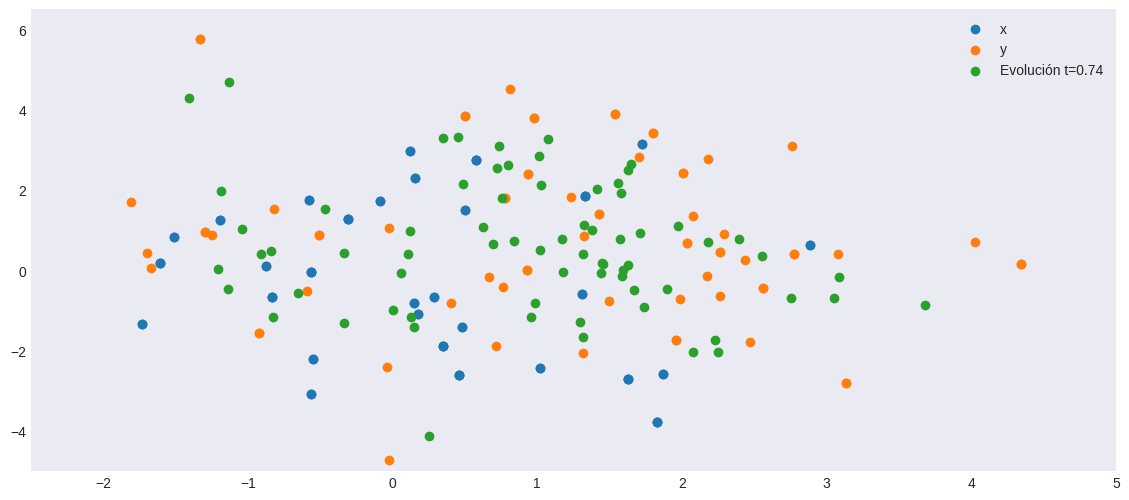

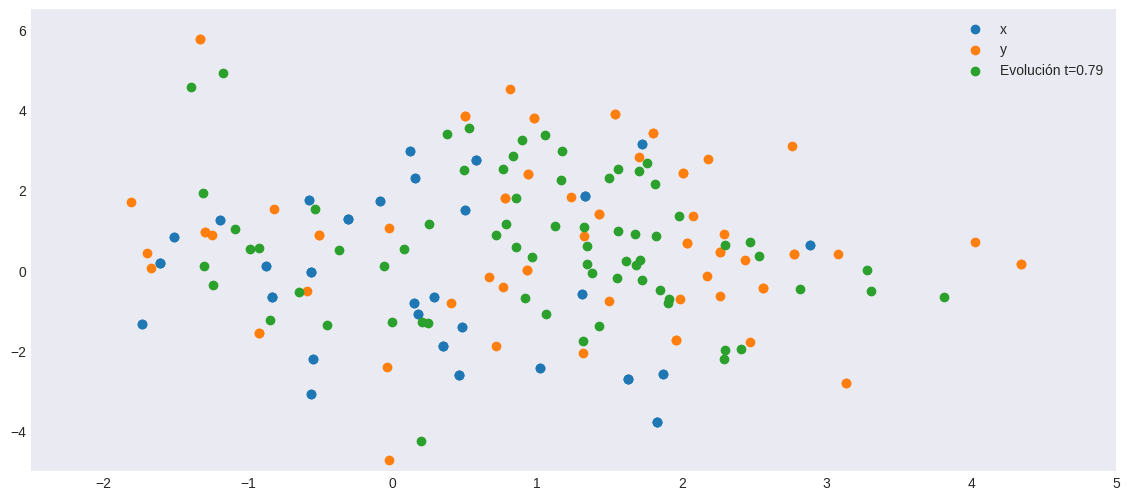

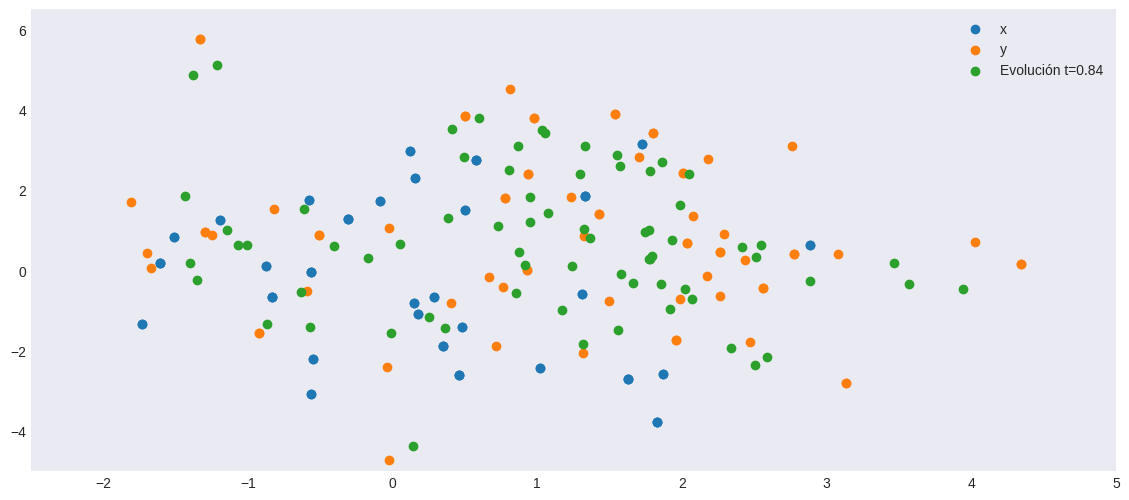

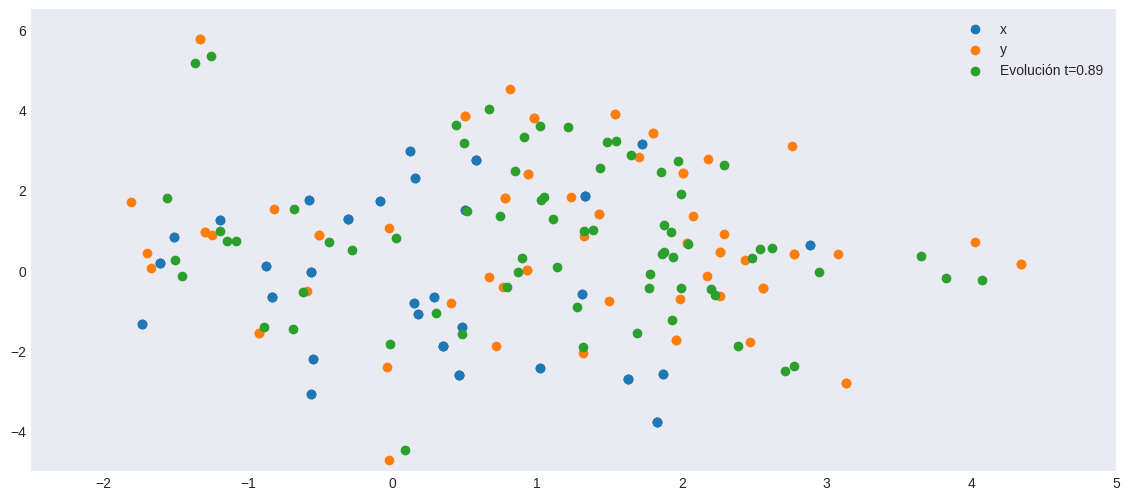

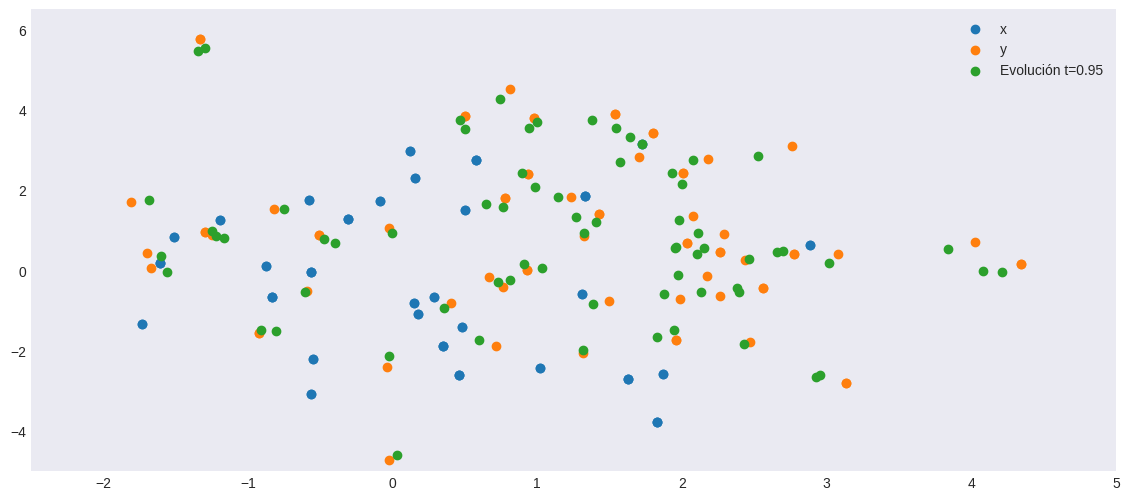

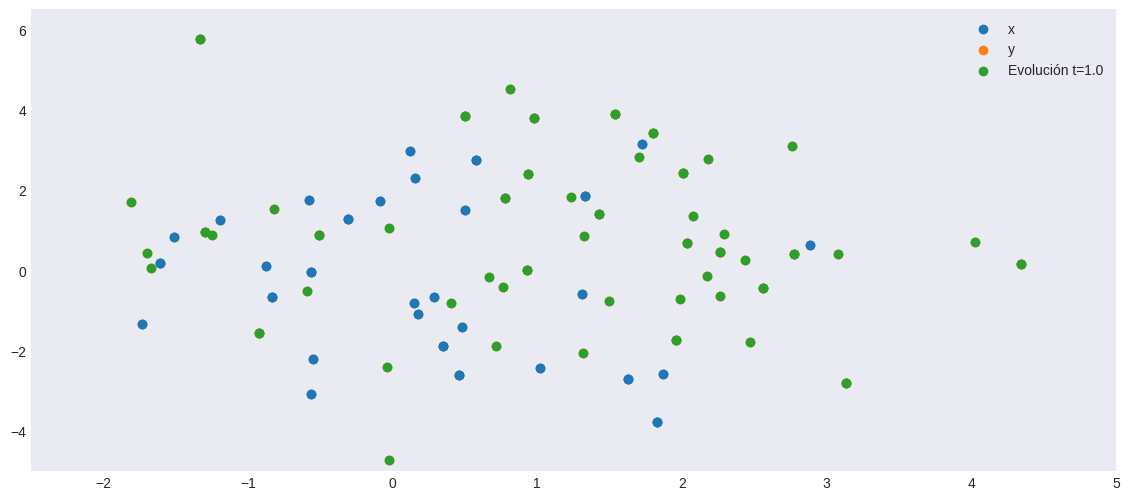

In [29]:
# Graficar por frames
for t in lista_t:
  x1 = np.array([item[0] for item in x_pos])
  x2 = np.array([item[1] for item in x_pos])
  y1 = np.array([item[0] for item in y_pos])
  y2 = np.array([item[1] for item in y_pos])

  plt.scatter(x1, x2, label='x', zorder=1)
  plt.scatter(y1, y2, label='y', zorder=2)
  plt.scatter((1-t)*x1 + t*y1, (1-t)*x2 + t*y2, label=f'Evolución t={round(t,2)}', zorder=10)
  plt.legend()
  plt.xlim(-2.5, 5)
  plt.ylim(-5, 6.5)
  plt.show()

Luego de ver por "frames" lo que está pasando, se procede a hacer un gif con el movimiento de las "partículas" para mejor visualización. De todas formas, ya se puede ver como el transporte parte de $x$ y va lentamente hacia $y$.

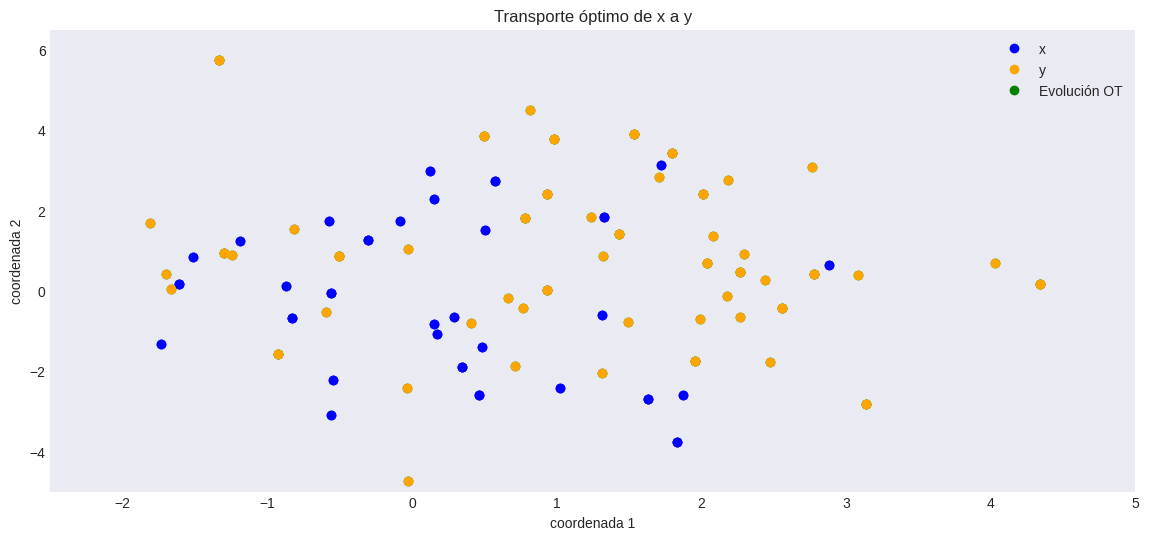

In [30]:
# GIF
camera = Camera(plt.figure())

labels = ['x', 'y', 'Evolución OT']
colors = ['blue', 'orange', 'green']
handles = []
for c, l in zip(colors, labels):
    handles.append(Line2D([0], [0], color = c, label = l, marker='o', linestyle='None'))

for t in lista_t:
  x1 = np.array([item[0] for item in x_pos])
  x2 = np.array([item[1] for item in x_pos])
  y1 = np.array([item[0] for item in y_pos])
  y2 = np.array([item[1] for item in y_pos])

  plt.scatter(x1, x2, c='blue', zorder=1)
  plt.scatter(y1, y2, c='orange', zorder=2)
  plt.scatter((1-t)*x1 + t*y1, (1-t)*x2 + t*y2, c='green')
  plt.xlim(-2.5, 5)
  plt.ylim(-5, 6.5)
  camera.snap()

plt.legend(handles = handles)
plt.title('Transporte óptimo de x a y')
plt.xlabel('coordenada 1')
plt.ylabel('coordenada 2')
anim = camera.animate(blit=True)
anim.save('scatter.mp4')

Con esto, se ha hecho el código para generar el gif y ver en movimiento el transporte óptimo de x a y.

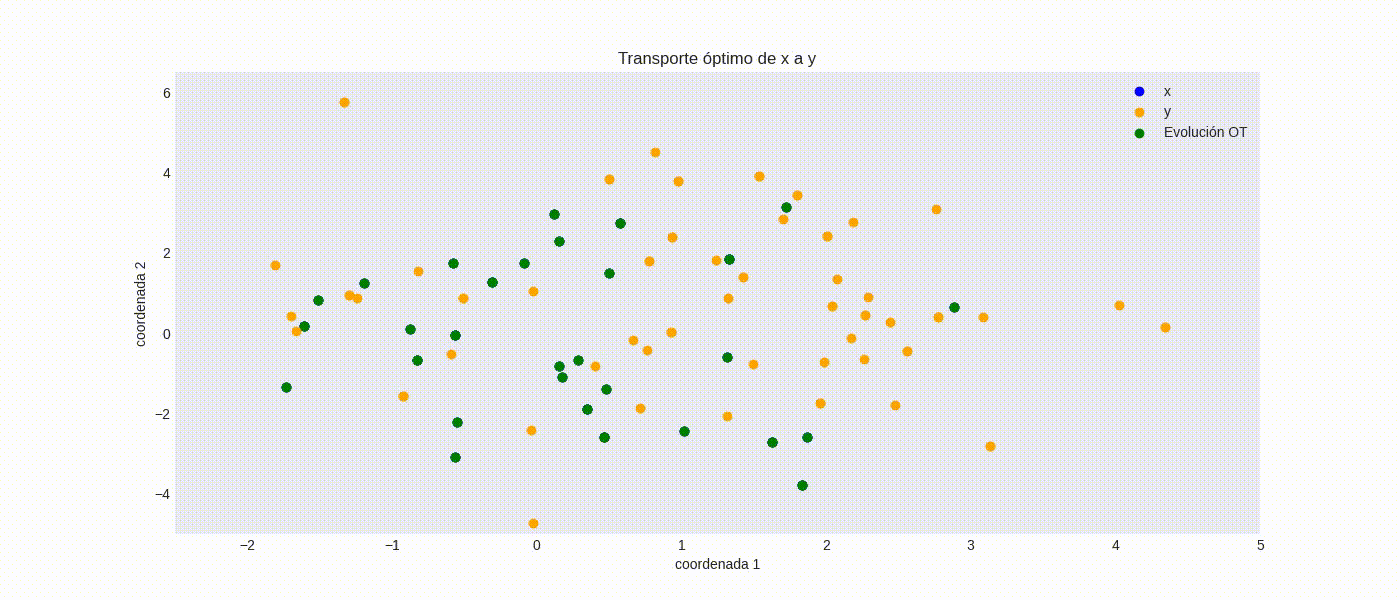